# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#dc322f; font-size:140%; text-align:center; border-radius:25px 60px;">Bank Marketing</p>

In [1]:
<img src="https://www.socialtoaster.com/wp-content/uploads/2018/10/Finance-and-Retail-Banking-Blog-Post.jpg" alt="Bank Marketing">

SyntaxError: invalid syntax (2504529362.py, line 1)

<a id="table of content"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Table of Content</p>

<a id="contents_tabel"></a>   

* [1- Importing Libraries 📚](#1)
    
* [2- Loading the Dataset 📊](#2)
    
* [3- Dataset Overview 🔍](#3)
    
* [4- EDA & Visualization 📊](#4)

    * [4-1- Categorical Features 📊](#5)
    
    * [4-2- Handling Unknown Values 🤔](#6)

    * [4-3- Numerical Features 📈](#7)

    * [4-4- Feature Engineering in Numerical Features 🛠️](#8)

        * [4-4-1- Age 🎂](#9)

        * [4-4-2- pdays 📞](#10)
        
        * [4-4-3- duration ⏱️](#11)
        
    * [4-5- Multivariate Analysis 📊](#12)
    
* [5- Preprocessing 🛠️](#13)

    * [5-1- Transforming skewed features 🔄](#14)
    
    * [5-2- Label Encoding 🔤](#15)

    * [5-3- Train test split 🚂🛤️](#16)

    * [5-4- Outlier detection 🚨](#17)

    * [5-5- Scaling 📏](#18)

    * [5-6- Handling Imbalanced label ⚖️](#19)

* [6- Modeling ⚡](#20)

    * [6-1- Logistic Regression   🎯](#21)
    
    * [6-2- K-Nearest Neighbors 🎯](#22)

    * [6-3- Support Vector Machine  🎯](#23)

    * [6-4- Decision Tree 🌳](#24)

    * [6-5- Random Forest 🌲](#25)

    * [6-6- AdaBoost 🚀](#26)

    * [6-7- XGBoost ⚡](#27)

    * [6-8- Feature Importance 📊](#28)

    * [6-9- Model Saving 💾](#29)

* [7- Conclusion 🎉](#30)


<a id="1"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Importing Libraries 📚</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, kurtosis, skew, boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM, SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import warnings
from time import perf_counter
import joblib

<a id="2"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">  Loading the Dataset 📊</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [4]:
!gdown --id 13idHMvaj0R-vspA056twR0l2b-eN-Fqd

/bin/bash: line 1: gdown: command not found


In [5]:
data = pd.read_csv('bank.csv', sep=';')

<a id="3"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Dataset Overview 🔍</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2 style="margin-bottom: 0;">Bank Marketing Dataset Information</h2>
    <p>The Bank Marketing dataset contains information related to direct marketing campaigns of a Portuguese banking institution. The dataset includes both numerical and categorical features, and the target variable indicates whether a client has subscribed to a term deposit or not.</p>
    <h3 style="margin-bottom: 0;">Features:</h3>
    <ol>
        <li><strong>Client Information:</strong>
            <ul>
                <li><code>age</code>: Age of the client</li>
                <li><code>job</code>: Type of job (e.g., management, blue-collar, technician)</li>
                <li><code>marital</code>: Marital status (e.g., married, single, divorced)</li>
                <li><code>education</code>: Level of education (e.g., primary, secondary, tertiary)</li>
            </ul>
        </li>
        <li><strong>Campaign Information:</strong>
            <ul>
                <li><code>campaign</code>: Number of contacts performed during this campaign for the client</li>
                <li><code>previous</code>: Number of contacts performed before this campaign for the client</li>
                <li><code>duration</code>: last contact duration, in seconds</li>
                <li><code>pdays</code>: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)</li>
                <li><code>poutcome</code>: Outcome of the previous marketing campaign (e.g., failure, success)</li>
            </ul>
        </li>
        <li><strong>Communication Channels:</strong>
            <ul>
                <li><code>contact</code>: Type of communication contact (e.g., cellular, telephone)</li>
                <li><code>month</code>: Last contact month of the year</li>
                <li><code>day</code>: Last contact day of the month</li>
            </ul>
        </li>
        <li><strong>Other Features:</strong>
            <ul>
                <li><code>balance</code>: Client's account balance</li>
                <li><code>default</code>: Has credit in default? (yes or no)</li>
                <li><code>housing</code>: Has housing loan? (yes or no)</li>
                <li><code>loan</code>: Has personal loan? (yes or no)</li>
            </ul>
        </li>
    </ol>
    <h3 style="margin-bottom: 0;">Target Variable:</h3>
    <p><code>subscribed</code>: Indicates whether the client has subscribed to a term deposit (yes or no)</p>
    <h3 style="margin-bottom: 0;">Total Number of Instances:</h3>
    <p>45,211</p>
    <h3 style="margin-bottom: 0;">Source:</h3>
    <p>The dataset is sourced from the UCI Machine Learning Repository and is publicly available at <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing">UCI Bank Marketing Dataset</a>.</p>
</div>


In [6]:
print("Few rows of the dataset:")
data

Few rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
print(f'The Shape of Dataset:\nNumber of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

The Shape of Dataset:
Number of rows: 4521
Number of columns: 17


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
print(f'Null values in each column:\n{data.isnull().sum()}')

Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p>The <code>data.isnull()</code> method indicates that this dataset has no <strong>missing values</strong>. However, it is important to investigate <strong>unknown</strong> values in different features.</p>
</div>

In [10]:
print("\nSummary statistics for numerical features:")
data.describe()


Summary statistics for numerical features:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Insights from Dataset Description</h2>
    <p>🔍 The dataset description provides valuable insights into the distribution and statistics of the numerical features:</p>
    <ol>
        <li><strong>Age:</strong>
            <ul>
                <li>The mean age of clients is approximately 41 years.</li>
                <li>The age of clients ranges from 18 to 95 years.</li>
                <li>The majority of clients are between the age of 33 and 48.</li>
            </ul>
        </li>
        <li><strong>Balance:</strong>
            <ul>
                <li>The mean account balance is approximately 1362 euros.</li>
                <li>The account balance varies widely, ranging from -8019 to 102127 euros.</li>
                <li>The distribution of account balances is skewed, with a large standard deviation of 3044.77.</li>
            </ul>
        </li>
        <li><strong>Day:</strong>
            <ul>
                <li>The mean last contact day of the month is approximately 16.</li>
            </ul>
        </li>
        <li><strong>Duration:</strong>
            <ul>
                <li>The mean duration of the last contact is approximately 258 seconds.</li>
                <li>The duration of the last contact ranges from 0 to 4918 seconds.</li>
                <li>The distribution of contact duration is right-skewed, with a large standard deviation of 257.</li>
            </ul>
        </li>
        <li><strong>Campaign:</strong>
            <ul>
                <li>The mean number of contacts performed during the current campaign is approximately 3.</li>
                <li>The number of campaign contacts ranges from 1 to 63.</li>
                <li>The majority of clients were contacted fewer than 3 times during the campaign, as indicated by the 75th percentile.</li>
            </ul>
        </li>
        <li><strong>Pdays (Number of days since the client was last contacted from a previous campaign):</strong>
            <ul>
                <li>The mean number of days since the client was last contacted is approximately 40 days.</li>
                <li>A negative value (-1) indicates that the client was not previously contacted.</li>
            </ul>
        </li>
        <li><strong>Previous (Number of contacts performed before this campaign for the client):</strong>
            <ul>
                <li>The number of previous contacts ranges from 0 to 275.</li>
                <li>The majority of clients were not contacted before this campaign, as indicated by the 75th percentile.</li>
            </ul>
        </li>
    </ol>
</div>


In [11]:
num_columns = data.select_dtypes(include=['int64']).columns

# Calculate mean and trimmed mean for each numeric columns
mean_vs_trimmed_mean = pd.DataFrame({'mean': data[num_columns].mean(),
                                     'trimmed_mean': data[num_columns].apply(lambda x: trim_mean(x, proportiontocut=0.1))})

# Calculate kurtosis and skewness for each numeric columns
kurtosis_skewness = pd.DataFrame({'kurtosis': data[num_columns].apply(kurtosis),
                                  'skewness': data[num_columns].apply(skew)})

print("Mean vs Trimmed Mean:")
print(mean_vs_trimmed_mean)

print("\nKurtosis and Skewness:")
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                 mean  trimmed_mean
age         41.170095     40.482444
balance   1422.657819    802.408073
day         15.915284     15.799834
duration   263.961292    216.442632
campaign     2.793630      2.141277
pdays       39.766645     11.558474
previous     0.542579      0.122201

Kurtosis and Skewness:
           kurtosis  skewness
age        0.347063  0.699269
balance   88.291280  6.594242
day       -1.039709  0.094596
duration  12.514870  2.771500
campaign  37.126499  4.742340
pdays      7.947004  2.716170
previous  51.936398  5.873309


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
<p><strong>Insights 💡</strong></p>
    <ol>
        <li><strong>Age:</strong>
            <ul>
            The distribution of age is slightly right-skewed. The kurtosis value is close to 0, indicating a distribution that is close to <strong>normal. 📊</strong>.
             </ul>
        </li>
        <li><strong>Balance:</strong>
            <ul>
            The balance data is heavily right-skewed with a very high positive skewness (8.36) and positive kurtosis (140.74). This suggests that there are <strong>many customers with low balances</strong> and a <strong>few customers with very high balances</strong>. 💰
                </ul>
                </li>
        <li><strong>Duration:</strong>
            <ul>
            The duration of the last contact is moderately right-skewed with a positive skewness of 3.14 and high positive kurtosis of 18.15. This indicates that there are some very long durations, potentially <strong>outliers</strong>, in the dataset. 🕒
            </ul>    
                </li>
        <li><strong>Campaign and Previous:</strong>
            <ul>
            Both campaign and previous features have high positive skewness and kurtosis values, indicating <strong>highly skewed distributions</strong> with heavy tails, potentially due to outliers. 📊
           <ul>
                </li>
    </ol>
</div>


In [12]:
print("\nSummary statistics for categorical features:")
data.describe(include='O')


Summary statistics for categorical features:


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [13]:
print(f'Unique values in each column:\n{data.nunique()}')

Unique values in each column:
age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [14]:
data.duplicated().sum()

0

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
<p><strong>Insights 💡</strong></p>
    <ul>
        <li>There are no duplicate records in the dataset, indicating each entry is unique. 🔄</li>
        <li>Also, we can see the most common value in each categorical feature. 📊</li>
        <li>According to the above results, we can conclude that:
            <ol>
                <li>Married individuals are the most prevalent group in the dataset. 👫</li>
                <li>A large portion of clients have completed secondary schooling. 🎓</li>
                <li>Most individuals did not subscribe to the service or product offered. This fact demonstrates that the label of this dataset is not balanced. ⚖️</li>
            </ol>
        </li>
    </ul>
</div>


<a id="4"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> EDA & Visualization 📊</p>

<a id="5"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Categorical Features 📊</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [15]:
# visualization style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">I decided to rename the <strong>y</strong> column to <strong>subscribed</strong> due to clean coding. 🔄</p>

In [16]:
data.rename(columns={'y': 'subscribed'}, inplace=True)

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">The two below code blocks clarify the <strong>value count</strong> and <strong>proportion</strong> of each unique value in the categorical features. 📊</p>

In [17]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

for col in categorical_cols:
    print(f"Percentage of each unique value in column '{col}':")
    value_counts = data[col].value_counts(normalize=True) * 100
    value_counts = value_counts.round(2).astype(str) + '%'
    print(value_counts)
    print("=====================================")
    print()


Percentage of each unique value in column 'job':
job
management       21.43%
blue-collar      20.92%
technician       16.99%
admin.           10.57%
services          9.22%
retired           5.09%
self-employed     4.05%
entrepreneur      3.72%
unemployed        2.83%
housemaid         2.48%
student           1.86%
unknown           0.84%
Name: proportion, dtype: object

Percentage of each unique value in column 'marital':
marital
married     61.87%
single      26.45%
divorced    11.68%
Name: proportion, dtype: object

Percentage of each unique value in column 'education':
education
secondary    51.01%
tertiary     29.86%
primary       15.0%
unknown       4.14%
Name: proportion, dtype: object

Percentage of each unique value in column 'default':
default
no     98.32%
yes     1.68%
Name: proportion, dtype: object

Percentage of each unique value in column 'housing':
housing
yes    56.6%
no     43.4%
Name: proportion, dtype: object

Percentage of each unique value in column 'loan':
loan


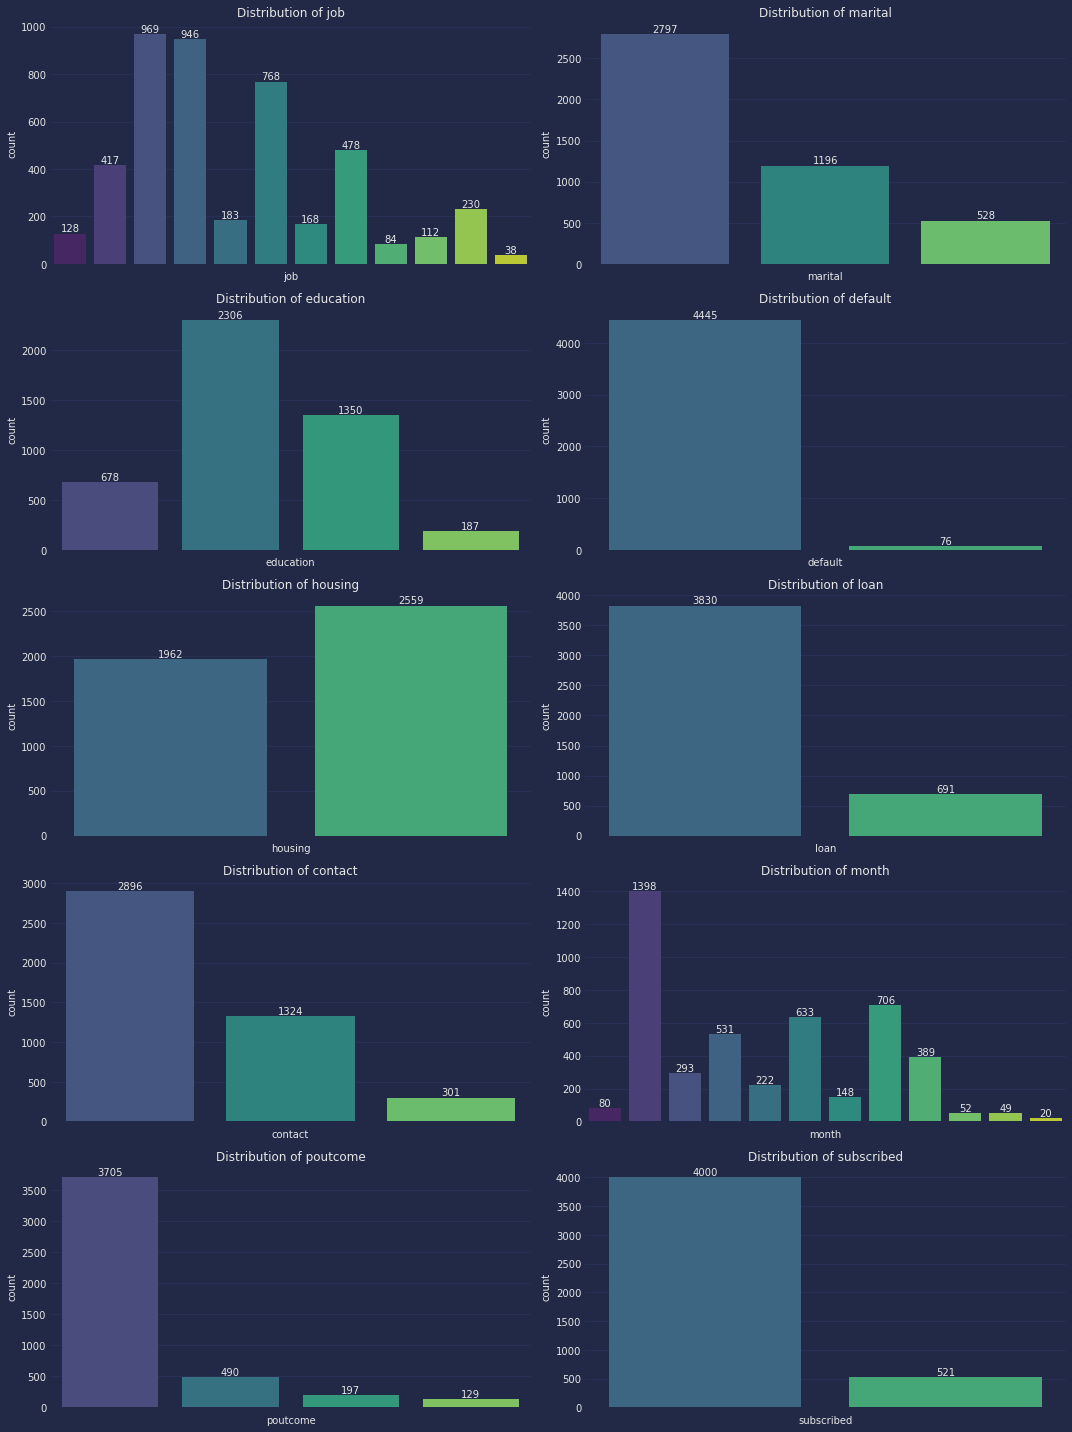

In [18]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li><strong>Blue-collar</strong> and <strong>management</strong> are the most common jobs in this dataset.</li>
        <li>The majority of clients Have no credit in default.</li>
        <li>The most of contacts occurred in <strong>May</strong>.</li>
        <li>Furthermore, These results confirm that ground truth is <strong>imbalanced</strong>.</li>
        <li>We can see that the <strong>job</strong>, <strong>education</strong>, <strong>contact</strong>, and <strong>poutcome</strong> features have <strong>unknown</strong> values. So, It is important to handle them before any other act on data.</li>
    </ul>
</div>


<a id="6"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Handling Unknown Values 🤔</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [19]:
unknown_columns = ['job', 'education', 'contact', 'poutcome']

for column in unknown_columns:
    unknown_count = data[column].eq('unknown').sum()
    print(f"Number of 'unknown' values in {column}: {unknown_count}")

Number of 'unknown' values in job: 38
Number of 'unknown' values in education: 187
Number of 'unknown' values in contact: 1324
Number of 'unknown' values in poutcome: 3705


<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">Before handling unknown values, I decided to determine the only rows where <strong>'pdays'</strong> is -1 and <strong>'previous'</strong> is 0, indicating that the client was not previously contacted. According to the dataset information, <strong>unknown</strong> values of <strong>poutcome</strong> column only present the clients who are in the <strong>new campaign</strong>. The following code snippet checks this case for us: 🕵️‍</p>


In [20]:
# Handling Unknown Values in 'poutcome'
# checking the clients just in the new campaign
new_campaign_clients = data[(data['pdays'] == -1) & (data['previous'] == 0)]
print('new_campaign_clients:', len(new_campaign_clients))

# unknown values in 'poutcome'
print("unknown values in 'poutcome' column: ", len(data[data['poutcome'] == 'unknown']))

# data[(data['pdays'] != -1) & (data['previous'] != 0) & (data['poutcome'] == 'unknown')]

new_campaign_clients: 3705
unknown values in 'poutcome' column:  3705


<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights</strong> 💡</p>
    <p>Based on the information provided, there are indeed <strong>5 null values</strong> in the <strong>poutcome</strong> column. This is inferred from the fact that the number of rows where <em>pdays</em> is -1 (indicating clients not previously contacted) is <strong>36954</strong>, and the number of <em>unknown</em> values in the <strong>poutcome</strong> column is <strong>36959</strong>.</p>
</div>


In [21]:
# Replace 36954 occurrences of "unknown" with "Not Applicable"
data.loc[data['pdays'] == -1, 'poutcome'] = 'Not Applicable'

# Replace the other unknown values with np.nan in the dataset
data.replace('unknown', np.nan, inplace=True)

# Verify the changes
print(data['poutcome'].value_counts())
print(data.isnull().sum())

poutcome
Not Applicable    3705
failure            490
other              197
success            129
Name: count, dtype: int64
age              0
job             38
marital          0
education      187
default          0
balance          0
housing          0
loan             0
contact       1324
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
subscribed       0
dtype: int64


<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>A description of the following code:</strong> 🛠️</p>
    <p>For imputing null values, <strong>KNNImputer</strong> is an appropriate choice.</p>
    <p>The KNNImputer requires numerical data for imputation, so we need to encode categorical variables into numerical format before using the imputer.</p>
    <p>Including the target column ('subscribed' in this case) in the imputation process can lead to data leakage. This code ensures that the target column ('subscribed') is excluded from the imputation process.</p>
    <p>To this end, this code first encodes the categorical variables into a numerical format using OrdinalEncoder, then performs imputation using KNNImputer, and finally converts the encoded columns back to their original categorical format using <code>inverse_transform</code>.</p>
</div>


In [22]:
# Encode categorical variables into numerical format before imputation.
# Perform imputation.
# Concatenate the imputed data with the target column.

impute_data = data.iloc[:, :-1].copy()

columns_with_missing = ['job', 'education', 'contact', 'poutcome']

# Encode categorical variables into numerical format
encoder = OrdinalEncoder()
impute_data[columns_with_missing] = encoder.fit_transform(impute_data[columns_with_missing])

# KNN Imputer
imputer = KNNImputer(n_neighbors=5)
impute_data[columns_with_missing] = imputer.fit_transform(impute_data[columns_with_missing])

# Convert encoded columns back to categorical format
impute_data[columns_with_missing] = encoder.inverse_transform(impute_data[columns_with_missing])

# Concatenate the imputed data with the target column
impute_data['subscribed'] = data['subscribed']

print(impute_data.isnull().sum())

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">So, we can see the value counts of categorical features after imputation: 📊</p>

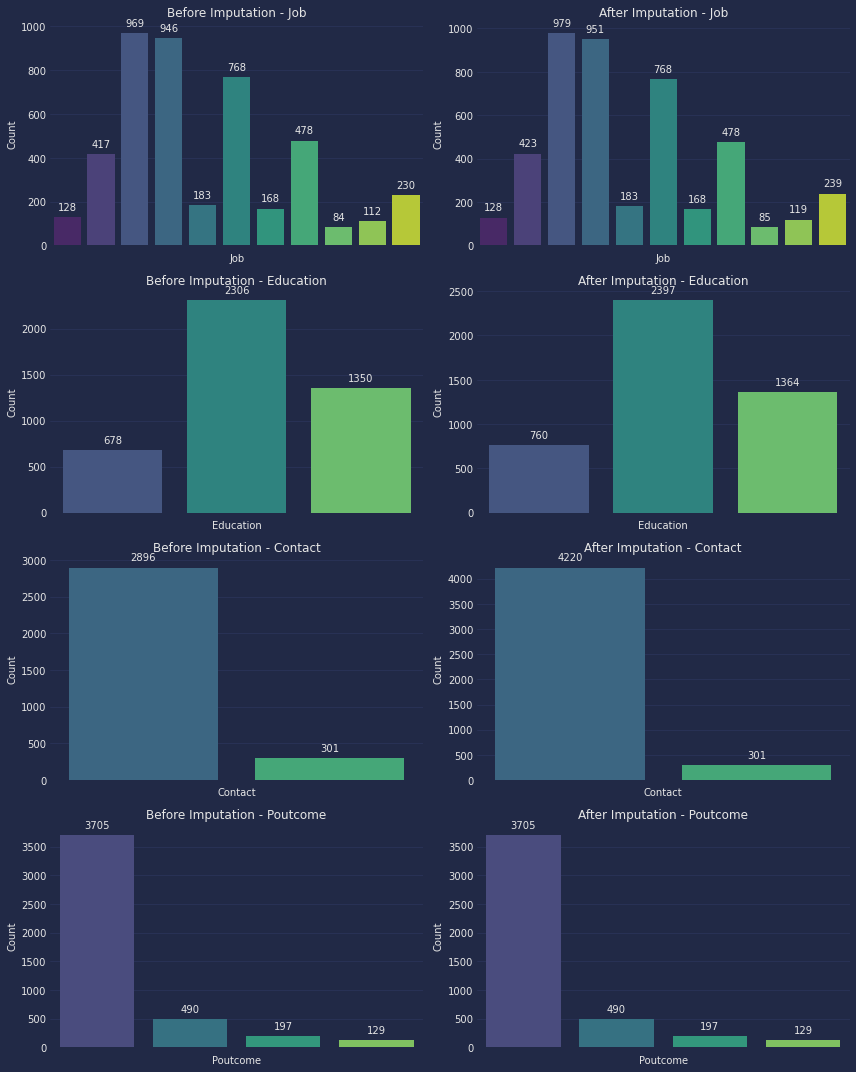

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Plot count plots before KNN imputation
for i, column in enumerate(['job', 'education', 'contact', 'poutcome']):
    sns.countplot(x=column, data=data, ax=axes[i, 0], palette='viridis')
    axes[i, 0].set_title(f'Before Imputation - {column.capitalize()}')
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45)
    axes[i, 0].set_xlabel(column.capitalize())
    axes[i, 0].set_ylabel('Count')
    for p in axes[i, 0].patches:
        axes[i, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot count plots after KNN imputation
for i, column in enumerate(['job', 'education', 'contact', 'poutcome']):
    sns.countplot(x=column, data=impute_data, ax=axes[i, 1], palette='viridis')
    axes[i, 1].set_title(f'After Imputation - {column.capitalize()}')
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=45)
    axes[i, 1].set_xlabel(column.capitalize())
    axes[i, 1].set_ylabel('Count')
    for p in axes[i, 1].patches:
        axes[i, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>The majority of contacts are <strong>cellular</strong> based.</li>
        <li><strong>Failure</strong> is the most common status for <em>poutcome</em>.</li>
    </ul>
</div>


<a id="7"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Numerical Features 📈</p>
⬆️ [Tabel of Contents](#contents_tabel)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

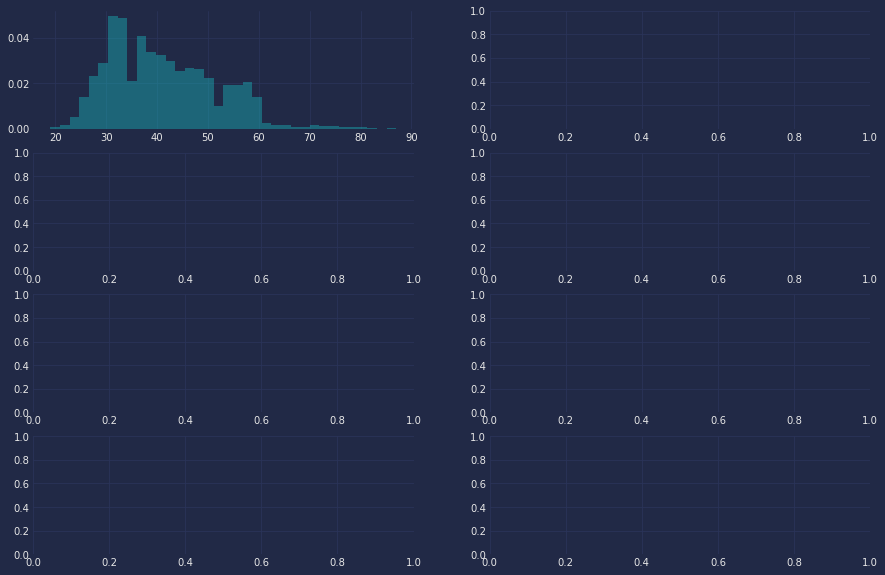

In [24]:
# filter warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(4, 2, figsize=(15,10))

index = 0
axs = axs.flatten()
for index, col in enumerate(impute_data.select_dtypes(include='number').columns):
  sns.distplot(impute_data[col], ax=axs[index])
  axs[index].set_title(col)
  index +=1
plt.tight_layout()
plt.show()

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
<p><strong>Insights 💡</strong></p>
    <ol>
        <li><strong>Age:</strong>
            <ul>
            As mentioned in the dataset overview section, this feature operates close to normal distribution.
             </ul>
        </li>
        <li><strong>Balance, duration, campaign, pdays, and previous:</strong>
            <ul>
            As we mentioned, this chart confirms that these features are right-skewed. So, we can see that there are some columns with very high values. As a result, we can conclude that these features have outliers. 📊
                </ul>
                </li>
        <li><strong>Day:</strong>
            <ul>
            This feature operates like a uniform distribution. However, This chart demonstrates that the contacts during the 15th to 20th of the month are more than on other days.
            </ul>    
                </li>
    </ol>
</div>


<a id="8"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Feature Engineering in Numerical Features 🛠️</p>

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">To get better insights from the dataset, we can use <code>pd.cut()</code> to categorize numerical features. 📊</p>


<a id="9"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Age 🎂</p>
⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">The following code snippet will categorize the <strong>age</strong> feature into specified age ranges and create a new categorical feature <strong>'age category'</strong> based on these ranges. 📊</p>


In [25]:
# Define the number of desired categories
num_categories = 8

# Use pd.cut to convert the 'age' column into categorical based on the specified number of categories
impute_data['age_category'] = pd.cut(impute_data['age'], bins=num_categories)

# Display unique values in the age_category column
impute_data['age_category'].value_counts()

age_category
(27.5, 36.0]      1558
(36.0, 44.5]      1088
(44.5, 53.0]       937
(53.0, 61.5]       545
(18.932, 27.5]     282
(61.5, 70.0]        57
(70.0, 78.5]        36
(78.5, 87.0]        18
Name: count, dtype: int64

In [26]:
# Define the category labels
category_labels = [
    '18-27 years',
    '28-37 years',
    '38-46 years',
    '47-56 years',
    '57-66 years',
    '67-75 years',
    '76-85 years',
    '86-95 years'
]

# Rename categories in the 'age_category' column
impute_data['age_category'] = impute_data['age_category'].cat.rename_categories(category_labels)

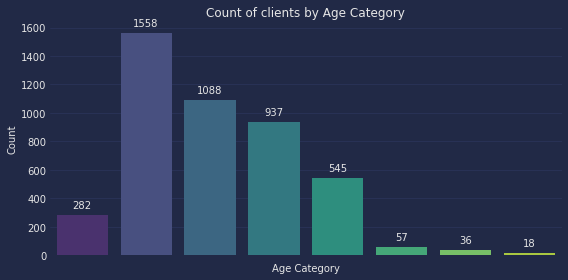

In [27]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='age_category', data=impute_data, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of clients by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>The most clients are in the age range of <strong>28 to 37 years old</strong>.</li>
    </ul>
</div>


<a id="10"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">pdays 📞</p>
⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">Since -1 indicates no contact before the campaign, it can be treated as a separate category. For other values of <strong>'pdays'</strong>, we can use ranges similar to how we categorized the <strong>'age'</strong> column. 📊</p>

In [28]:
# Define the bin edges for categorizing 'pdays'
pdays_bins = [-1, 0, 100, 200, 300, 400, 500, 600, 700, 800, np.inf]

# Define the category labels
pdays_labels = ['No contact in previous campaigns', '0-100 days', '101-200 days', '201-300 days', '301-400 days', '401-500 days',
                '501-600 days', '601-700 days', '701-800 days', 'More than 800 days']

# Use pd.cut to convert 'pdays' column into categorical based on the specified bins and labels
impute_data['pdays_category'] = pd.cut(impute_data['pdays'], bins=pdays_bins, labels=pdays_labels, right=False)

# Display unique values in the pdays_category column
impute_data['pdays_category'].value_counts()

pdays_category
No contact in previous campaigns    3705
101-200 days                         300
301-400 days                         219
201-300 days                         137
0-100 days                           134
401-500 days                          17
601-700 days                           3
More than 800 days                     3
501-600 days                           2
701-800 days                           1
Name: count, dtype: int64

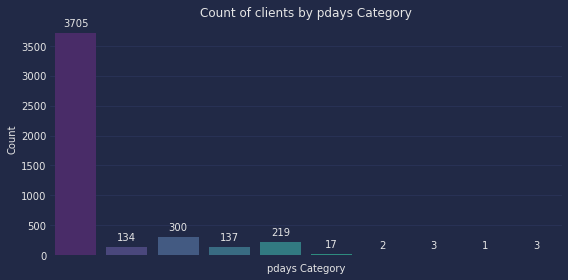

In [29]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='pdays_category', data=impute_data, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of clients by pdays Category')
plt.xlabel('pdays Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>This result confirms that the majority of the clients had no contacts in the previous campaign.</li>
        <li>Customers with <strong>pdays=101-200</strong> and <strong>pdays=301-400</strong> are more numerous compared to the rest.</li>
    </ul>
</div>


<a id="11"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> duration ⏱️</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [30]:
# Define the number of desired categories
num_categories = 5

# Use pd.cut to convert the 'duration' column into categorical based on the specified number of categories
impute_data['duration_category'] = pd.cut(impute_data['duration'], bins=num_categories)

# Display unique values in the duration_category column
impute_data['duration_category'].value_counts()

duration_category
(0.979, 608.2]      4110
(608.2, 1212.4]      358
(1212.4, 1816.6]      45
(1816.6, 2420.8]       5
(2420.8, 3025.0]       3
Name: count, dtype: int64

In [31]:
# Define the bin edges for categorizing 'duration'
duration_bins = [0, 60, 180, 300, 600, 1800, np.inf]

# Define the category labels
duration_labels = ['0-1 min', '1-3 min', '3-5 min', '5-10 min', '10-30 min', 'More than 30 min']

# Use pd.cut to convert 'duration' column into categorical based on the specified bins and labels
impute_data['duration_category'] = pd.cut(impute_data['duration'], bins=duration_bins, labels=duration_labels, right=False)

# Display unique values in the duration_category column
impute_data['duration_category'].value_counts()


duration_category
1-3 min             1723
3-5 min             1052
5-10 min             843
0-1 min              480
10-30 min            414
More than 30 min       9
Name: count, dtype: int64

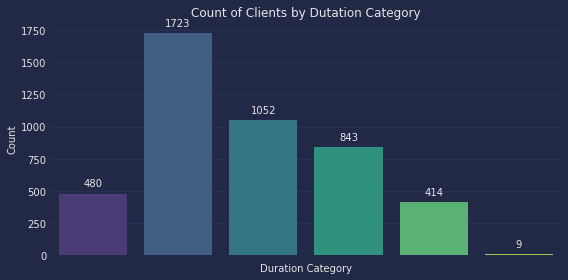

In [32]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='duration_category', data=impute_data, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of Clients by Dutation Category')
plt.xlabel('Duration Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
<p><strong>Insights 💡</strong></p>
    <p>The contacts with <strong>1 to 3 minutes</strong> duration are the most common in this dataset.</p>
    <p>We can see that there are <strong>107 contacts</strong> with more than 30 minutes. So, these contacts can be considered as outliers in the preprocessing phase.</p>
</div>


<a id="12"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Multivariate Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [33]:
# Crosstab: Relationship between 'job' and 'subscribed' status
job_subscribed_crosstab = pd.crosstab(impute_data['job'], impute_data['subscribed'], normalize = 'index')
subscribed_job_crosstab = pd.crosstab(impute_data['subscribed'], impute_data['job'], normalize = 'index')

# Display the crosstab
print("Crosstab: Relationship between 'job' and 'subscribed' status")
print(job_subscribed_crosstab)
print("\n")
print(subscribed_job_crosstab)

Crosstab: Relationship between 'job' and 'subscribed' status
subscribed           no       yes
job                              
admin.         0.878661  0.121339
blue-collar    0.927445  0.072555
entrepreneur   0.910714  0.089286
housemaid      0.857143  0.142857
management     0.865169  0.134831
retired        0.769874  0.230126
self-employed  0.890710  0.109290
services       0.905437  0.094563
student        0.776471  0.223529
technician     0.891927  0.108073
unemployed     0.898438  0.101562


job           admin.  blue-collar  entrepreneur  housemaid  management  \
subscribed                                                               
no          0.105000     0.220500      0.038250    0.02550    0.211750   
yes         0.111324     0.132438      0.028791    0.03263    0.253359   

job          retired  self-employed  services   student  technician  \
subscribed                                                            
no          0.046000       0.040750  0.095750  0.016500 

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li><strong>'Student'</strong>, <strong>'retired'</strong>, and <strong>'management'</strong> have the highest proportion of subscribers (28.68%), (22.70%), and (13.67%), respectively, which could be due to factors such as financial stability ('retired') or lower financial commitments ('student').</li>
        <li>On the other hand, <strong>'blue-collar'</strong> and <strong>'entrepreneur'</strong> have the lowest proportion of subscribers, which might be attributed to their lower income levels or different financial priorities.</li>
        <li>So, if we target the <strong>'Student'</strong>, <strong>'retired'</strong>, and <strong>'management'</strong> groups in marketing campaigns maybe we can get better results.</li>
    </ul>
</div>


In [34]:
# Crosstab: Relationship between 'job' and 'subscribed' status
month_subscribed_crosstab = pd.crosstab(impute_data['month'], impute_data['subscribed'], normalize = 'index')

# Display the crosstab
print("Crosstab: Relationship between 'month' and 'subscribed' status")
print(month_subscribed_crosstab)

Crosstab: Relationship between 'month' and 'subscribed' status
subscribed        no       yes
month                         
apr         0.808874  0.191126
aug         0.875197  0.124803
dec         0.550000  0.450000
feb         0.828829  0.171171
jan         0.891892  0.108108
jul         0.913598  0.086402
jun         0.896422  0.103578
mar         0.571429  0.428571
may         0.933476  0.066524
nov         0.899743  0.100257
oct         0.537500  0.462500
sep         0.673077  0.326923


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ol>
        <li><strong>Seasonal Trends in Subscription Behavior:</strong>
            <ul>
                <li>Months like <strong>'mar' (March), 'dec' (December), 'oct' (October), and 'sep' (September)</strong> have relatively higher proportions of subscribers compared to other months.</li>
                <li>On the other hand, months like <strong>'may', 'aug' (August), 'jul' (July), and 'nov' (November)</strong> have lower proportions of subscribers.</li>
            </ul>
        </li>
        <li><strong>Marketing Strategies and Seasonal Campaigns:</strong>
            <ul>
                <li>Months with lower subscription rates may require more novel marketing strategies to increase subscription numbers.</li>
            </ul>
        </li>
    </ol>
</div>


In [35]:
# Crosstab: Relationship between 'age_category' and 'subscribed' status
age_category_subscribed_crosstab = pd.crosstab(impute_data['age_category'], impute_data['subscribed'], normalize = 'index')
subscribed_age_category_crosstab = pd.crosstab(impute_data['subscribed'], impute_data['age_category'], normalize = 'index')

# Display the crosstab
print("Crosstab: Relationship between 'age_category' and 'subscribed' status")
print(age_category_subscribed_crosstab)
print('\n')
print(subscribed_age_category_crosstab)

Crosstab: Relationship between 'age_category' and 'subscribed' status
subscribed          no       yes
age_category                    
18-27 years   0.843972  0.156028
28-37 years   0.890244  0.109756
38-46 years   0.908088  0.091912
47-56 years   0.886873  0.113127
57-66 years   0.889908  0.110092
67-75 years   0.719298  0.280702
76-85 years   0.555556  0.444444
86-95 years   0.555556  0.444444


age_category  18-27 years  28-37 years  38-46 years  47-56 years  57-66 years  \
subscribed                                                                      
no               0.059500     0.346750     0.247000     0.207750     0.121250   
yes              0.084453     0.328215     0.191939     0.203455     0.115163   

age_category  67-75 years  76-85 years  86-95 years  
subscribed                                           
no                0.01025      0.00500     0.002500  
yes               0.03071      0.03071     0.015355  


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
   <p><strong>Insights 💡</strong></p>
    <ul>
        <li>The age category <strong>'86-95 years'</strong> stands out with the highest subscription rate, while the youngest category has a relatively lower rate.</li>
        <li><strong>Older age</strong> categories generally exhibit higher subscription rates compared to <strong>younger age</strong> categories.</li>
    </ul>
</div>


In [36]:
# Crosstab: Relationship between 'pdays_category' and 'subscribed' status
pdays_category_subscribed_crosstab = pd.crosstab(impute_data['pdays_category'], impute_data['subscribed'], normalize = 'index')
subscribed_pdays_category_crosstab = pd.crosstab(impute_data['subscribed'], impute_data['pdays_category'], normalize = 'index')

# Display the crosstab
print("Crosstab: Relationship between 'pdays_category' and 'subscribed' status")
print(pdays_category_subscribed_crosstab)
print('\n')
print(subscribed_pdays_category_crosstab)

Crosstab: Relationship between 'pdays_category' and 'subscribed' status
subscribed                              no       yes
pdays_category                                      
No contact in previous campaigns  0.909042  0.090958
0-100 days                        0.544776  0.455224
101-200 days                      0.766667  0.233333
201-300 days                      0.861314  0.138686
301-400 days                      0.904110  0.095890
401-500 days                      0.470588  0.529412
501-600 days                      0.500000  0.500000
601-700 days                      0.666667  0.333333
701-800 days                      0.000000  1.000000
More than 800 days                0.666667  0.333333


pdays_category  No contact in previous campaigns  0-100 days  101-200 days  \
subscribed                                                                   
no                                      0.842000    0.018250      0.057500   
yes                                     0.646833    0.11

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Customers with 'No contact in previous campaigns' have a relatively lower subscription rate (9.16%) compared to those with contact in previous campaigns.</li>
        <li>Customers with recent contacts (e.g., '0-100 days', '101-200 days') tend to have higher subscription rates compared to those with no recent contact.</li>
        <li>Subscription rates vary across different ranges of days since the last contact. For example, customers with 'More than 800 days' since the last contact have a higher subscription rate.</li>
        <li>According to these results, targeting customers with previous contacts may lead to higher subscription rates.</li>
    </ul>
</div>


In [37]:
# Crosstab: Relationship between 'duration_category' and 'subscribed' status
duration_category_subscribed_crosstab = pd.crosstab(impute_data['duration_category'], impute_data['subscribed'], normalize = 'index')
subscribed_duration_category_crosstab = pd.crosstab(impute_data['subscribed'], impute_data['duration_category'], normalize = 'index')

# Display the crosstab
print("Crosstab: Relationship between 'duration_category' and 'subscribed' status")
print(duration_category_subscribed_crosstab)
print('\n')
print(subscribed_duration_category_crosstab)

Crosstab: Relationship between 'duration_category' and 'subscribed' status
subscribed               no       yes
duration_category                    
0-1 min            0.997917  0.002083
1-3 min            0.968079  0.031921
3-5 min            0.897338  0.102662
5-10 min           0.803084  0.196916
10-30 min          0.553140  0.446860
More than 30 min   0.333333  0.666667


duration_category   0-1 min   1-3 min   3-5 min  5-10 min  10-30 min  \
subscribed                                                             
no                 0.119750  0.417000  0.236000  0.169250   0.057250   
yes                0.001919  0.105566  0.207294  0.318618   0.355086   

duration_category  More than 30 min  
subscribed                           
no                         0.000750  
yes                        0.011516  


<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <p>Customers with longer contact durations exhibit higher subscription rates compared to shorter durations.</p>
</div>


<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">The following function provides an appropriate setup for bivariate analysis. 📊</p>

In [38]:
def plot_countplot_with_annotations(data, x_col, hue_col):
    """
    Function to create a countplot with annotations.

    Parameters:
    - data: DataFrame containing the data
    - x_col: Column to be plotted on x-axis
    - hue_col: Column to be used for coloring (hue)

    Returns:
    - None (displays the plot)
    """
    # Plot countplot
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=x_col, hue=hue_col, data=data)

    # Add annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, xytext=(0, 5),
                    textcoords='offset points')

    # Set labels and title
    plt.xlabel(x_col.capitalize())  # Capitalize the column name for label
    plt.ylabel('Count')
    plt.title(f'Count of Subscriptions by {x_col.capitalize()} Status')

    # Show plot
    plt.show()

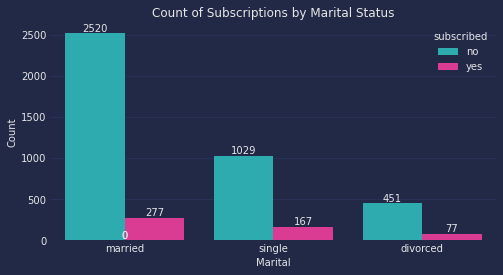

In [39]:
plot_countplot_with_annotations(impute_data, 'marital', 'subscribed')

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Married individuals have the highest count of both subscribers and non-subscribers, suggesting they constitute a significant portion of the dataset.</li>
        <li>Single individuals have a comparatively higher proportion of subscribers relative to their count, indicating potential effectiveness in targeting this demographic for subscription-based services.</li>
    </ul>
</div>


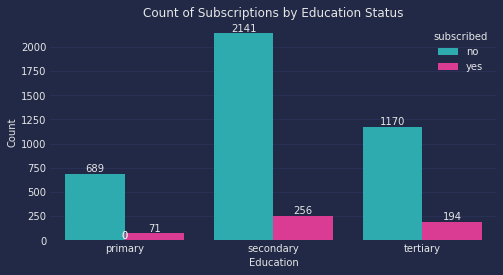

In [40]:
plot_countplot_with_annotations(impute_data, 'education', 'subscribed')

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Customers with secondary education constitute the largest group in both subscribers and non-subscribers.</li>
        <li>While tertiary-educated individuals have a higher proportion of subscribers relative to their count, indicating potential effectiveness in targeting this demographic for subscription-based services.</li>
    </ul>
</div>


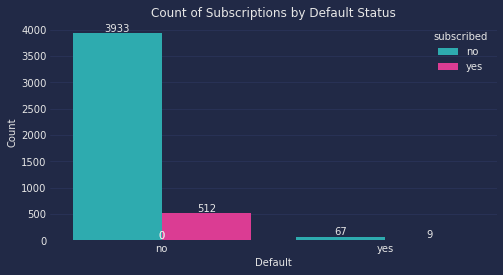

In [41]:
plot_countplot_with_annotations(impute_data, 'default', 'subscribed')

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Customers without a default status constitute the vast majority of both subscribers and non-subscribers.</li>
        <li>The number of subscribers among customers with a default status is very low, indicating potential challenges or barriers to subscription among this group.</li>
    </ul>
</div>


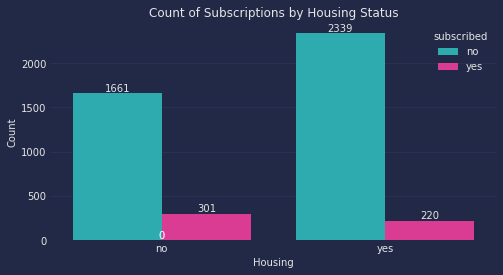

In [42]:
plot_countplot_with_annotations(impute_data, 'housing', 'subscribed')

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Customers without a housing loan constitute a larger portion of subscribers, suggesting they might be more inclined to subscribe to the term deposit.</li>
        <li>However, the count of non-subscribers is higher among customers with a housing loan.</li>
    </ul>
</div>


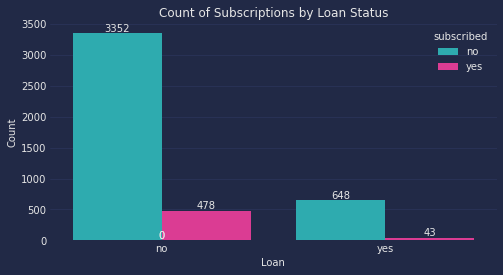

In [43]:
plot_countplot_with_annotations(impute_data, 'loan', 'subscribed')

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Customers without a personal loan constitute a larger portion of subscribers, suggesting they might be more inclined to subscribe to the term deposit.</li>
        <li>However, the count of non-subscribers is higher among customers with a personal loan, indicating potential differences in subscription behavior based on personal loan status.</li>
    </ul>
</div>


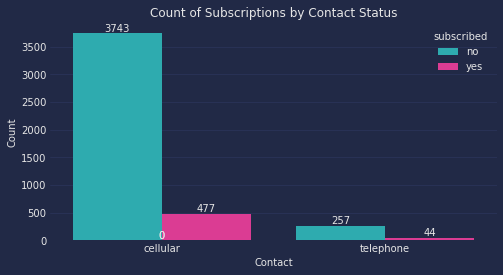

In [44]:
plot_countplot_with_annotations(impute_data, 'contact', 'subscribed')

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Customers contacted via cellular communication constitute a larger portion of subscribers, suggesting they might be more responsive to this communication channel.</li>
        <li>However, the count of non-subscribers is higher among customers contacted via cellular communication, indicating potential differences in subscription behavior based on the communication type.</li>
    </ul>
</div>


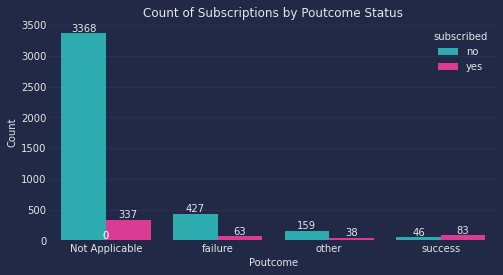

In [45]:
plot_countplot_with_annotations(impute_data, 'poutcome', 'subscribed')

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>Clients with successful outcomes in the previous campaign show a higher propensity to subscribe to the term deposit.</li>
        <li>The largest count of non-subscribers is observed among clients categorized as 'Not Applicable', indicating that previous campaign success greatly influences subscription rates in the current campaign.</li>
    </ul>
</div>


In [46]:
# Create pivot table with trimmed mean
pivot_result = impute_data.pivot_table(
    ['age', 'day', 'balance'],
    ['subscribed'],
    aggfunc = lambda x: trim_mean(x, proportiontocut=0.1),
)

print("Pivot Table:")
print(pivot_result)

Pivot Table:
                  age      balance        day
subscribed                                   
no          40.397500   761.147500  15.831875
yes         41.263789  1121.839329  15.553957


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ol>
        <li><strong>Relationship between Age and Subscription Status:</strong>
            <ul>
                <li>There's a subtle difference in the average age between subscribers and non-subscribers, suggesting age may not be a strong predictor of subscription status.</li>
            </ul>
        </li>
        <li><strong>Relationship between Balance and Subscription Status:</strong>
            <ul>
                <li>This indicates that customers with higher average balances are more likely to subscribe to the term deposit.</li>
            </ul>
        </li>
        <li><strong>Relationship between Day and Subscription Status:</strong>
            <ul>
                <li>This suggests that subscribers were contacted earlier in the month compared to non-subscribers, although the difference is relatively small.</li>
            </ul>
        </li>
    </ol>
</div>


In [47]:
# Define columns for groupby
groupby_columns = ['duration', 'campaign', 'previous']

# using groupby
groupby_result = impute_data.groupby('subscribed')[groupby_columns].agg(lambda x: trim_mean(x, 0.1))

# Display the result
print("Groupby:")
print(groupby_result)


Groupby:
              duration  campaign  previous
subscribed                                
no          190.232812  2.187813  0.072500
yes         499.582734  1.848921  0.606715


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ol>
        <li><strong>Relationship between Duration and Subscription Status:</strong>
            <ul>
                <li>This suggests that longer contact duration tends to be associated with a higher likelihood of subscription.</li>
            </ul>
        </li>
        <li><strong>Relationship between Campaign and Subscription Status:</strong>
            <ul>
                <li>This indicates that subscribers tend to require fewer contact attempts through campaigns before subscribing.</li>
            </ul>
        </li>
        <li><strong>Relationship between Previous Contacts and Subscription Status:</strong>
            <ul>
                <li>This confirms that subscribers tend to have more previous contacts compared to non-subscribers, indicating potentially higher engagement or interest in the term deposit.</li>
            </ul>
        </li>
    </ol>
</div>


In [48]:
# Define columns for groupby
groupby_columns = ['job', 'education']
numerical_columns = ['balance', 'duration', 'campaign']

# using groupby
groupby_result = impute_data.groupby(['job', 'subscribed'])[numerical_columns].agg(lambda x: trim_mean(x, 0.1))

# Display the result
print("Groupby:")
print(groupby_result)

Groupby:
                              balance    duration  campaign
job           subscribed                                   
admin.        no           722.089286  165.187500  2.127976
              yes         1097.187500  424.687500  1.437500
blue-collar   no           644.232295  207.701133  2.182720
              yes          820.701754  670.017544  1.771930
entrepreneur  no           721.626016  200.853659  1.967480
              yes          841.846154  653.076923  2.307692
housemaid     no           773.073171  203.658537  2.243902
              yes         1951.400000  542.000000  2.133333
management    no           987.243004  183.615611  2.324006
              yes         1366.905660  456.594340  2.113208
retired       no          1149.459459  195.770270  2.155405
              yes         1773.066667  443.866667  1.422222
self-employed no           817.114504  179.580153  2.358779
              yes         1177.687500  611.937500  2.375000
services      no           584.

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡:</strong></p>
    <ul>
        <li>Non-subscribers generally have lower average balances, shorter contact durations, and higher campaign numbers compared to subscribers.</li>
        <li>Subscribers tend to have higher average balances, longer contact durations, and lower campaign numbers compared to non-subscribers.</li>
        <li>Notable differences are observed between non-subscribers and subscribers within specific job categories. For example, subscribers in administrative roles exhibit significantly higher average balances and longer contact durations compared to non-subscribers in the same category.</li>
        <li>This trend holds across diverse job categories, indicating a consistent pattern of behavior regarding balance, duration, and campaign engagement between non-subscribers and subscribers.</li>
    </ul>
</div>


In [49]:
# Define columns for groupby
numerical_columns = ['balance', 'duration', 'campaign']

# using groupby
groupby_result = impute_data.groupby(['education', 'subscribed'])[numerical_columns].agg(lambda x: trim_mean(x, 0.1))

# Display the result
print("Groupby wit:")
print(groupby_result)

Groupby wit:
                          balance    duration  campaign
education subscribed                                   
primary   no           722.229656  185.479204  2.273056
          yes         1207.666667  577.192982  1.929825
secondary no           675.772329  196.877408  2.147110
          yes          990.966019  515.213592  1.703883
tertiary  no           959.229701  181.273504  2.214744
          yes         1299.147436  454.506410  2.025641


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>This result again confirms that Non-subscribers generally have lower average balances, shorter contact durations, and higher campaign numbers than subscribers.</li>
        <li>Notable differences are observed between non-subscribers and subscribers within each education level. For example, subscribers with primary education exhibit significantly higher average balances and longer contact durations compared to non-subscribers with primary education.</li>
        <li>Similar patterns are observed across different education levels, indicating consistent behavior regarding balance, duration, and campaign engagement between non-subscribers and subscribers, regardless of education level.</li>
    </ul>
</div>


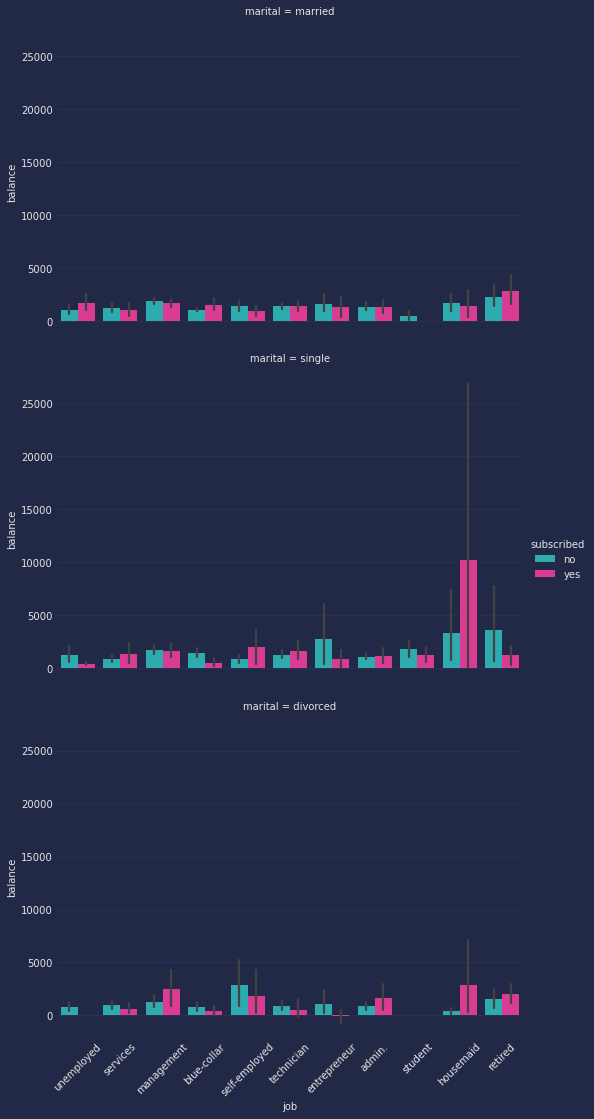

In [50]:
axs = sns.catplot(data=impute_data,
            x='job',
            y='balance',
            hue='subscribed',
            kind='bar',
            col='marital',
            col_wrap=1,
            aspect=1.5);
axs.tick_params(axis='x', labelrotation=45)

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>These results confirm our hypothesis that subscribers generally have higher balances compared to the Non-subscribers.</li>
        <li>Furthermore, in the divorced status, there are notable differences in balance between Non-subscribers and subscribers. For example, balance values in the 'self-employed' job have a very wide range.</li>
    </ul>
</div>

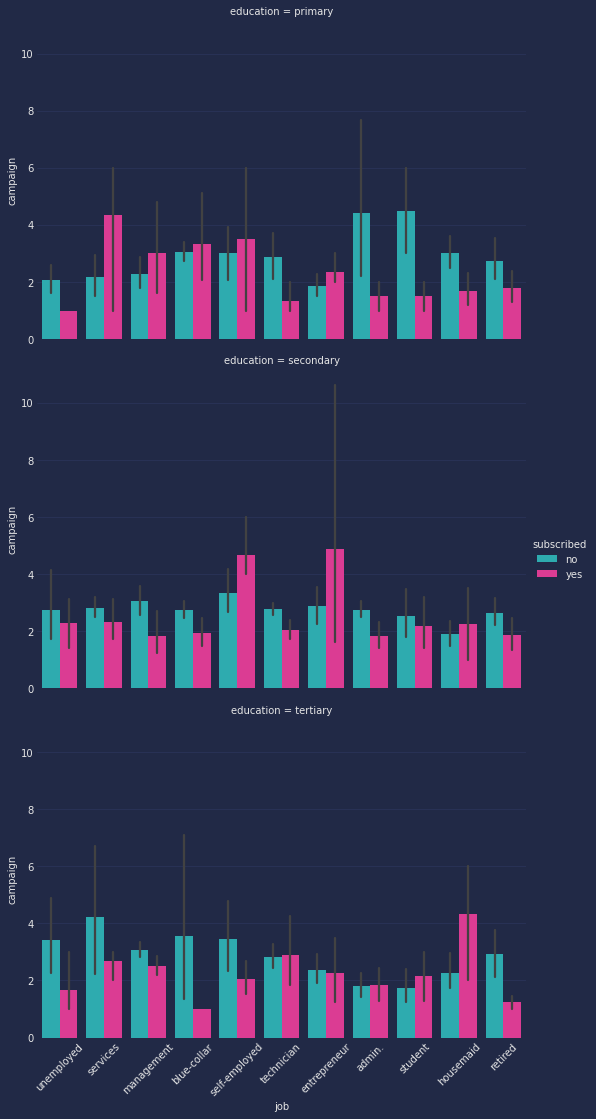

In [51]:
axs = sns.catplot(data=impute_data,
            x='job',
            y='campaign',
            hue='subscribed',
            kind='bar',
            col='education',
            col_wrap=1,
            aspect=1.5);
axs.tick_params(axis='x', labelrotation=45)

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>These results confirm our hypothesis that clients generally need lower contacts to subscribe to a term deposit.</li>
        <li>This fact perfectly aligns with the tertiary education level. However, for secondary and primary education levels, respectively for the two occupations of housemaid and entrepreneur, it is not true, and these two jobs require more contact to encourage subscription.</li>
    </ul>
</div>


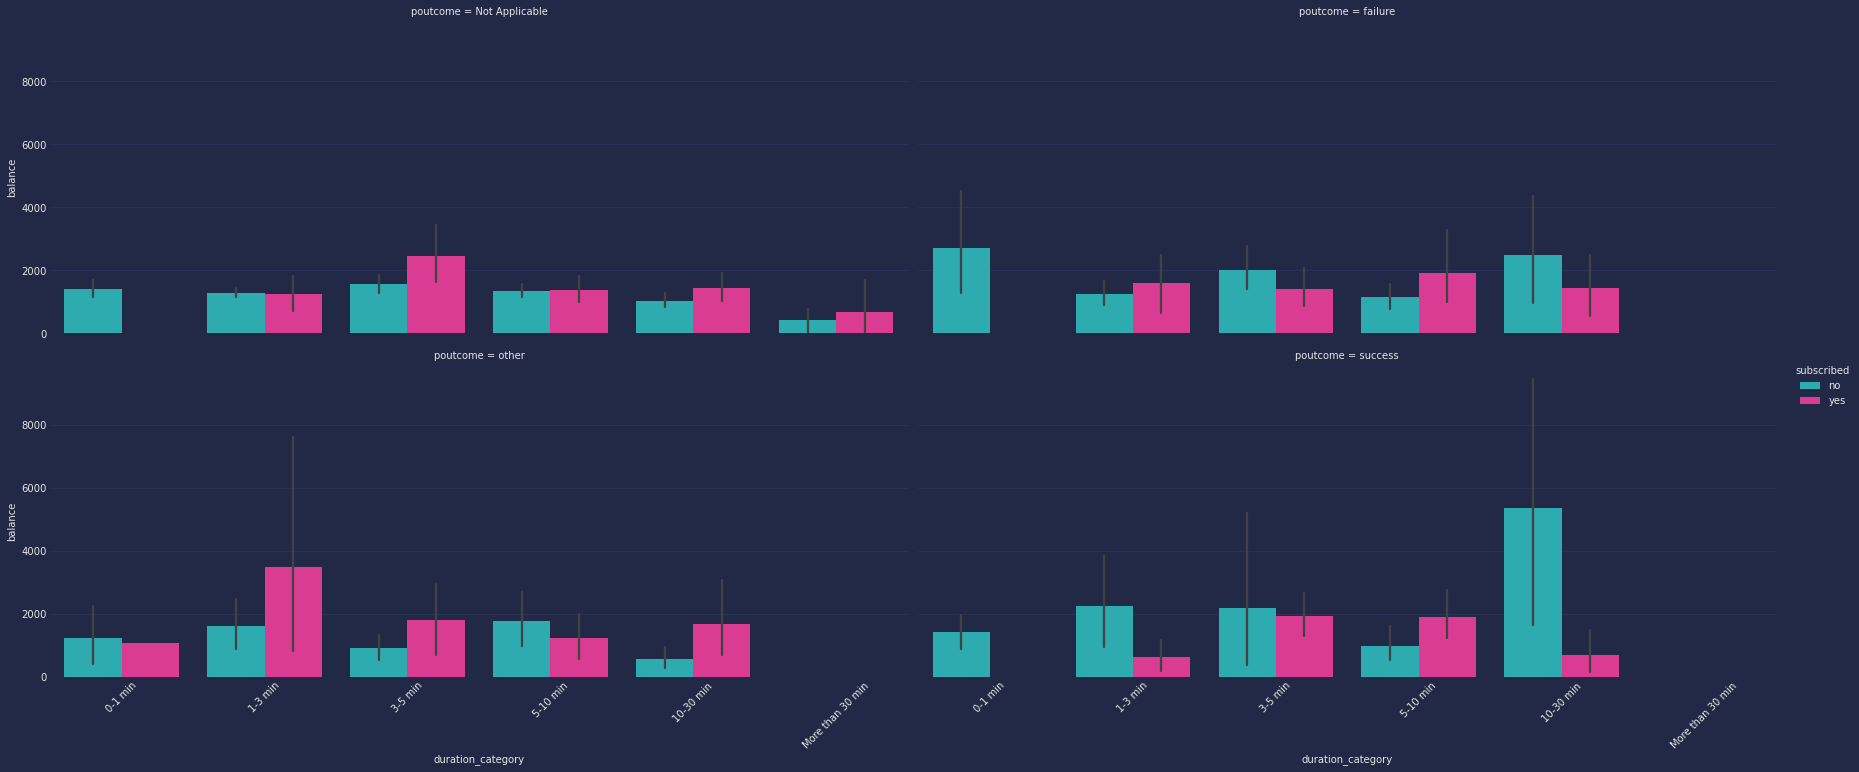

In [52]:
axs = sns.catplot(data=impute_data,
            x='duration_category',
            y='balance',
            hue='subscribed',
            kind='bar',
            col='poutcome',
            col_wrap=2,
            aspect=2.5);
axs.tick_params(axis='x', labelrotation=45)

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <ul>
        <li>In the previous visualization, we see that subscribers have a higher balance. This chart also confirms this fact. while giving us some other information.</li>
        <li>For example, for new clients and clients with 'poutcome=other', the balance value of subscribers in more than 30 minutes (duration) is lower than for Non-subscribers. However, this result indicates that a duration of more than 30 minutes can be considered an outlier due to the contrary behavior of the majority of the population.</li>
        <li>Clients with failure and success status in poutcome almost decided to not subscribe if their duration is 0-1 min. This fact shows that clients with previous contacts require better strategies instead of short contact during a new campaign.</li>
    </ul>
</div>


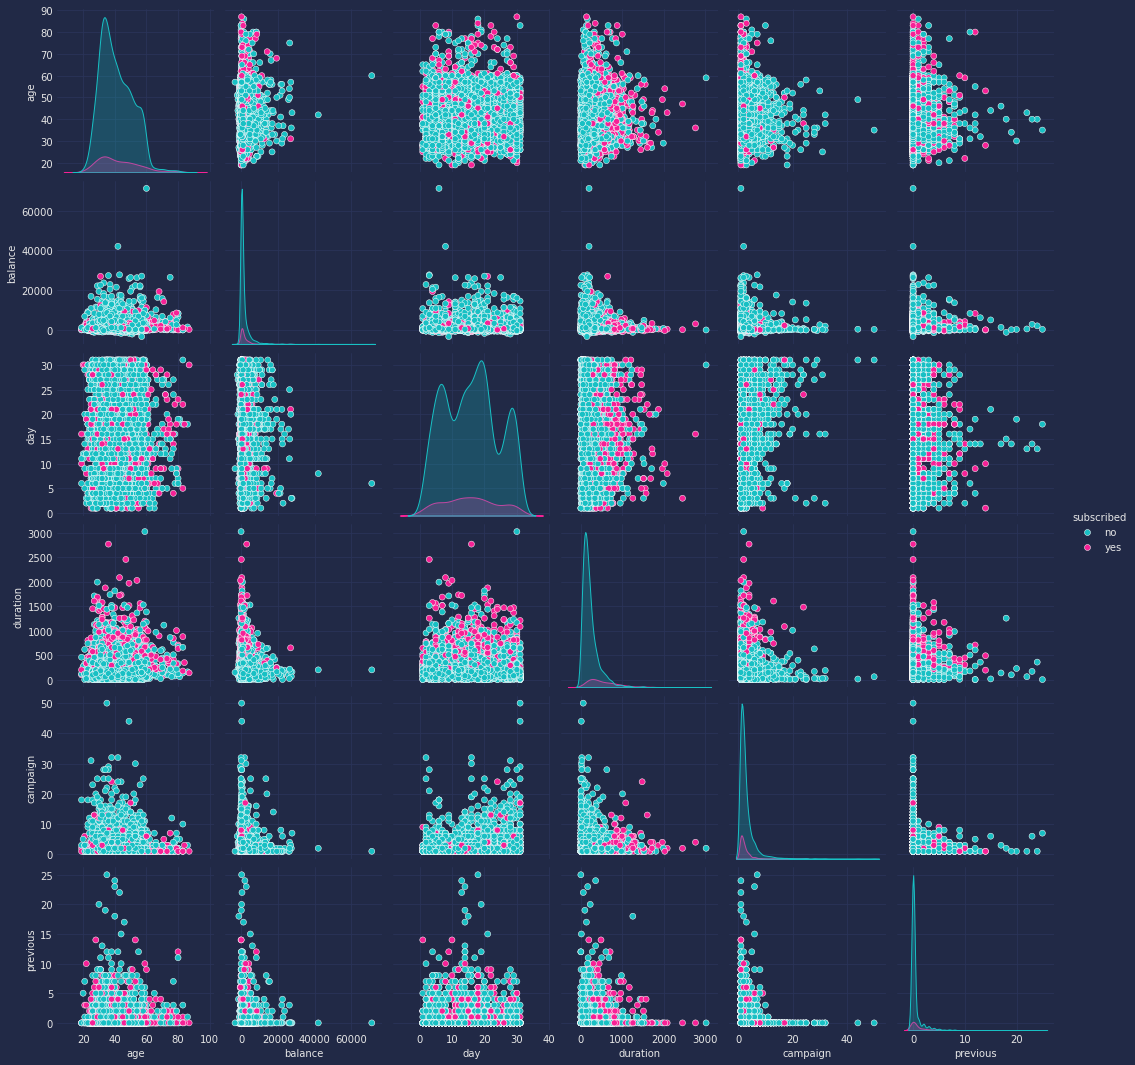

In [53]:
sns.pairplot(impute_data,
             x_vars=['age', 'balance', 'day', 'duration', 'campaign', 'previous'],
             y_vars=['age', 'balance', 'day', 'duration', 'campaign', 'previous'],
             hue='subscribed')

The highest correlation between numerical features:



age          balance
balance          age
day         campaign
duration    campaign
campaign         day
pdays       previous
previous       pdays
dtype: object

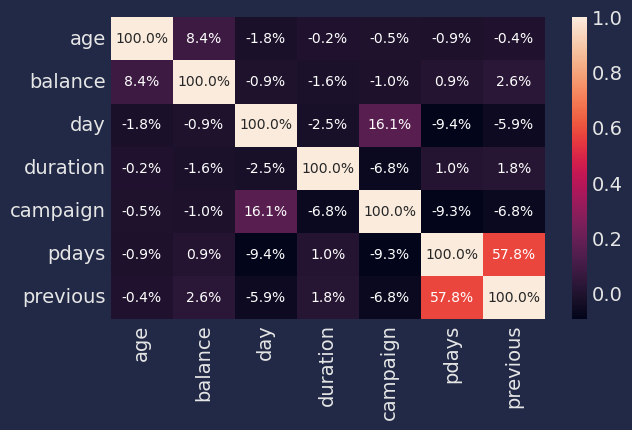

In [54]:
corr_mat = impute_data.select_dtypes(include=['int64']).corr()
plt.rcParams['figure.figsize'] = [7,4]
plt.rcParams['figure.dpi'] = 100
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.heatmap(corr_mat, annot=True, fmt=".1%")

# find the highest corr
print('The highest correlation between numerical features:\n')
for x in range(len(impute_data.select_dtypes(include=['int64']).columns)):
    corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Insights 💡</strong></p>
    <p>Heatmap demonstrates that there are relations between 'pdays' and 'previous'. This relation originates from 'pdays=-1' and 'previous=0' for new clients that had no contacts before the campaign.</p>
</div>


<a id="13"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Preprocessing 🛠️</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Preprocessing Steps 🛠️:</strong></p>
    <ol>
        <li>Transforming skewed features</li>
        <li>Label encoding</li>
        <li>Outlier detection</li>
        <li>Scaling</li>
        <li>Handling Imbalanced label</li>
    </ol>
</div>

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">Before implementing the preprocessing, we should drop redundant columns. We added these features to get better insights but now is the time to drop them. 🗑️</p>


<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">The <strong>'age_category'</strong>, <strong>'duration_category'</strong>, and <strong>'pdays_category'</strong> are new features in the dataset. I decided to drop <strong>'age_category'</strong>, <strong>'duration_category'</strong>, and <strong>'pdays'</strong>. 🗑️</p>


<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">Since <strong>'pdays'</strong> and <strong>'previous'</strong> have some relation, we can consider the categorized <strong>'pdays'</strong>. 🔄</p>


In [55]:
# drop redundunt columns
impute_data = impute_data.drop(['age_category', 'duration_category', 'pdays'], axis=1)

<a id="14"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Transforming skewed features 🔄</p>
⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">According to the visualization section, some features have high skewness in this dataset. Transforming the skewed features can improve the training phase. 📊</p

In [56]:
# numerical_columns
numerical_columns = impute_data.select_dtypes(include=['number']).columns
numeric_data = impute_data[numerical_columns]

# Calculate skewness of numerical features
skewness = numeric_data.apply(skew)

print("Skewness of numerical features:")
print(skewness)


Skewness of numerical features:
age         0.699269
balance     6.594242
day         0.094596
duration    2.771500
campaign    4.742340
previous    5.873309
dtype: float64


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
        
<div>       
    <ul>
        <li>To this end, we can apply <code>np.log</code> or <code>np.sqrt</code> for 'campaign', 'previous', and 'duration' features.</li>
        <li>However, since the 'balance' feature has negative values, we should use alternative methods.</li>
    </ul>
</div>


In [57]:
# Define the columns to transform
columns_to_transform = ['campaign', 'previous', 'duration']

# Create new columns for sqrt and log transformations
for column in columns_to_transform:
    impute_data[f'{column}_sqrt'] = np.sqrt(impute_data[column])
    impute_data[f'{column}_log'] = np.log1p(impute_data[column])

# Calculate skewness before and after transformations
skewness_before = impute_data[columns_to_transform].apply(skew)
skewness_after_sqrt = impute_data[[f'{column}_sqrt' for column in columns_to_transform]].apply(skew)
skewness_after_log = impute_data[[f'{column}_log' for column in columns_to_transform]].apply(skew)

# Print skewness before and after transformations
print("Skewness before transformation:")
print(skewness_before)
print("\nSkewness after square root transformation:")
print(skewness_after_sqrt)
print("\nSkewness after log transformation:")
print(skewness_after_log)

Skewness before transformation:
campaign    4.742340
previous    5.873309
duration    2.771500
dtype: float64

Skewness after square root transformation:
campaign_sqrt    2.146486
previous_sqrt    2.518098
duration_sqrt    1.082238
dtype: float64

Skewness after log transformation:
campaign_log    1.305240
previous_log    2.464277
duration_log   -0.467719
dtype: float64


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

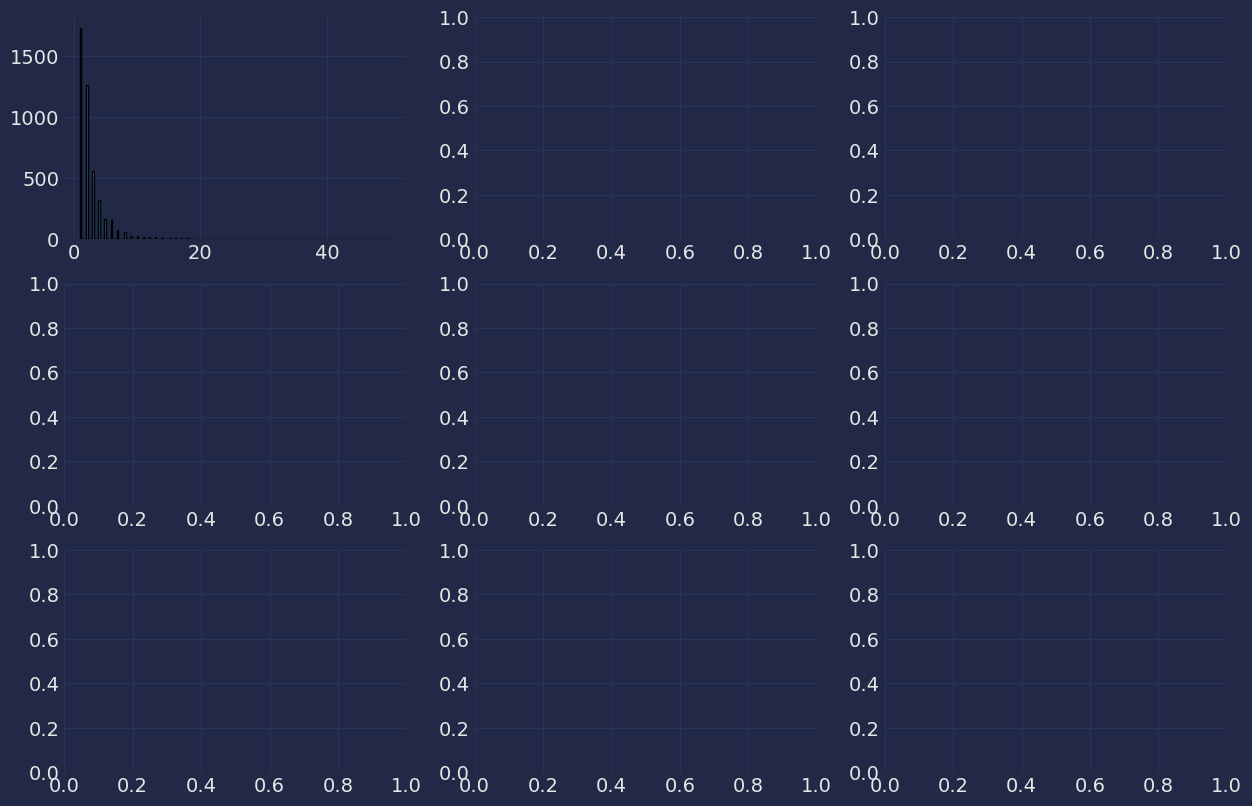

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(columns_to_transform):
    sns.histplot(impute_data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Before)')

    sns.histplot(impute_data[f'{column}_sqrt'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {column} (sqrt)')

    sns.histplot(impute_data[f'{column}_log'], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribution of {column} (log)')

plt.tight_layout()
plt.show()

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">I decided to evaluate two methods for the 'balance' feature. The following code snippet indicates the <code>shift_log</code> and <code>boxcox</code> methods. 📊</p>

In [59]:
# method1:
# Shift the 'balance' and 'pdays' features to make all values positive
shifted_balance_balance = impute_data['balance'] - impute_data['balance'].min() + 1  # Adding 1 to handle zeros

# Apply Log Transformation with Shift
balance_log_transformed = np.log(shifted_balance_balance)

impute_data['balance_log'] = balance_log_transformed
#-------------------------------------------------------------

#method2:
# Apply Box-Cox transformation to 'balance' and 'pdays' feature
impute_data['balance_boxcox'], lambda_value = boxcox(impute_data['balance'] + abs(impute_data['balance'].min()) + 1)  # Adding 1 to handle zeros

# print("Lambda Value:", lambda_value)
#-------------------------------------------------------------
new_columns = ['balance', 'balance_log', 'balance_boxcox']
new_data = impute_data[new_columns]


# Calculate skewness of features
skewness = new_data.apply(skew)

print("Skewness of features:")
print(skewness)


Skewness of features:
balance           6.594242
balance_log      -0.355547
balance_boxcox    0.086726
dtype: float64


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

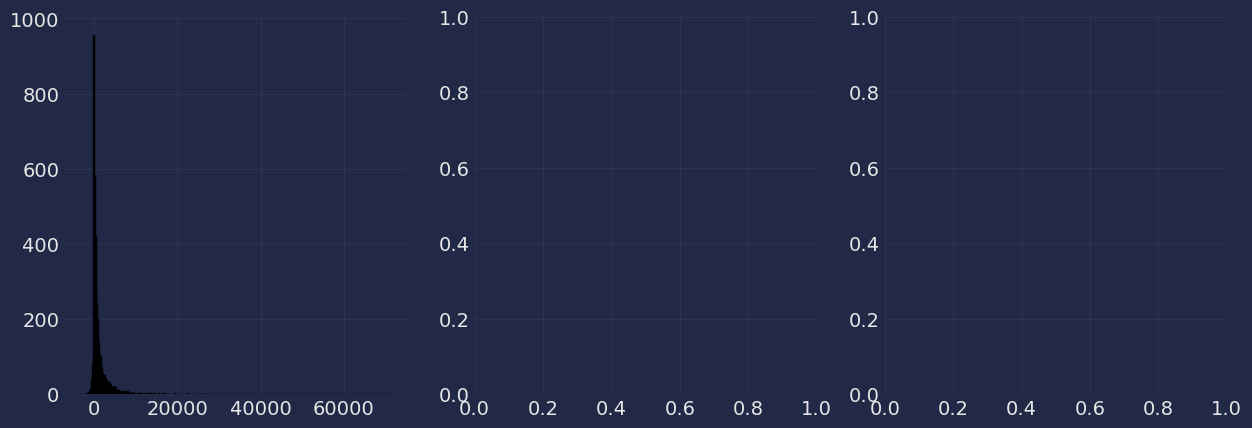

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()

for i, column in enumerate(new_columns):
    sns.histplot(impute_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">According to the results, better skewness is achieved by applying <code>log</code> and <code>boxcox</code>. 📊</p>

In [61]:
# drop redundunt columns
impute_data = impute_data.drop(['balance', 'balance_log', 'campaign', 'campaign_sqrt',
                                'previous', 'previous_sqrt', 'duration', 'duration_sqrt'], axis=1)

<a id="15"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Label Encoding 🔤</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [62]:
# target column:
conversion_dict = {"yes": 1, "no": 0}
impute_data['subscribed'] = impute_data['subscribed'].map(conversion_dict)

# using pd.get_dummies for other features
impute_data = pd.get_dummies(impute_data, drop_first=True)

<a id="16"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Train test split 🚂🛤️</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [63]:
X = impute_data.drop(['subscribed'], axis=1)
y = impute_data.loc[:, 'subscribed'].values

In [64]:
# Split Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (3616, 47) (3616,)
Testing set shape (X, y): (905, 47) (905,)


<a id="17"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Outlier detection 🚨</p>
⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">According to the EDA section, we supposed some features have outliers. To this end, first, we should plot the <code>'boxplot'</code> and then decide to handle them. 📊</p>


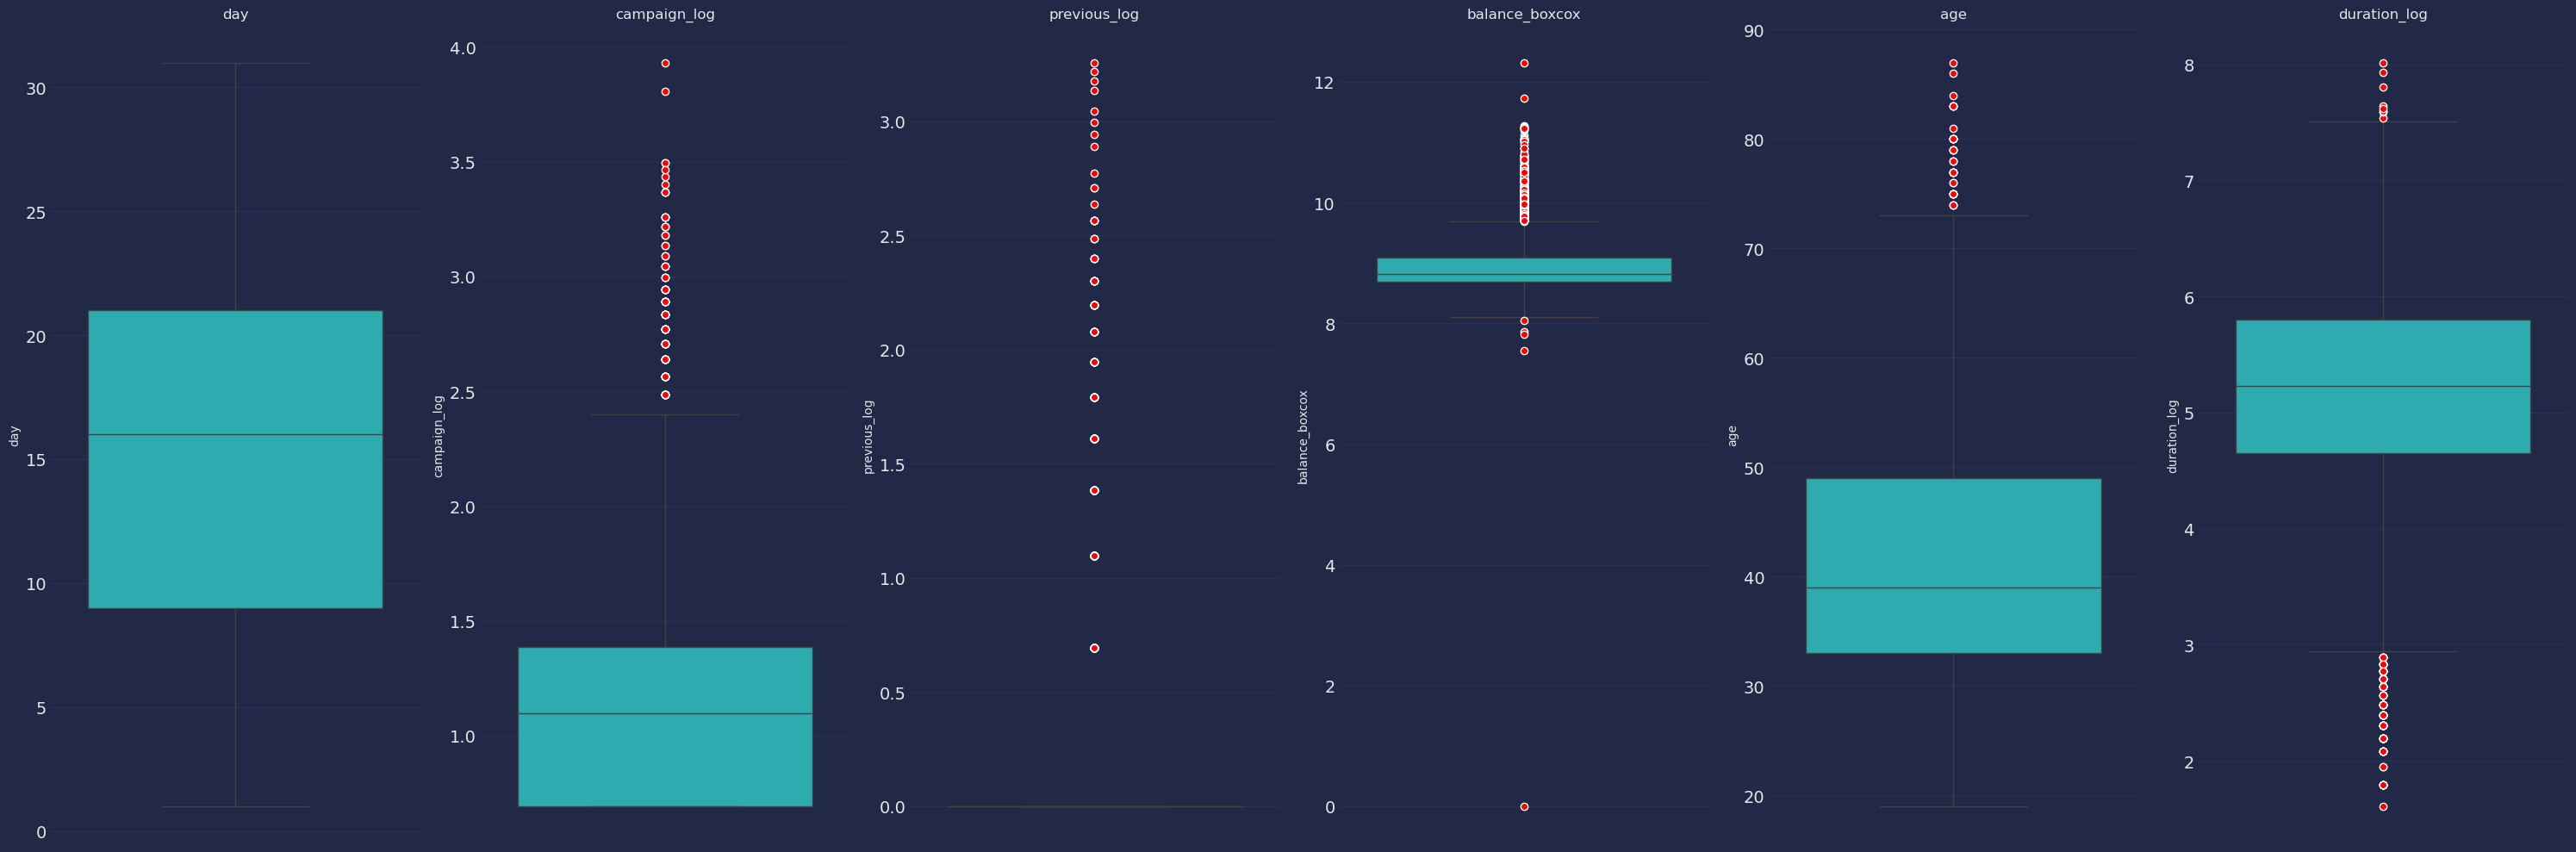

In [65]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

numerical_columns = ['day', 'campaign_log', 'previous_log', 'balance_boxcox', 'age', 'duration_log']

# Create boxplots for numerical columns
num_plots = len(numerical_columns)

fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(30, 10))

for index, col in enumerate(numerical_columns):
    sns.boxplot(y=impute_data[col], ax=axes[index], flierprops=red_circle)
    axes[index].set_ylabel(col)
    axes[index].set_title(col)

plt.tight_layout()
plt.show()

In [66]:
# outlier data
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [67]:
# outlier data
columns = ['day', 'campaign_log', 'previous_log', 'balance_boxcox', 'age', 'duration_log']
outlier_detection = impute_data[columns]
for k, v in outlier_detection.items():
        outliers = find_outliers_IQR(v)
        perc = len(find_outliers_IQR(v)) * 100.0 / np.shape(outlier_detection)[0]
        print(f'Column :{k}')
        print(f"Number of Outliers = {len(outliers)}","||",f"Max Outlier Value = {outliers.max()}",
              "||", f"Min Outlier Value = {outliers.min()}", "||", f"Percentage of Outliers = {perc:.2f}%")
        print("\n")

Column :day
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :campaign_log
Number of Outliers = 130 || Max Outlier Value = 3.9318256327243257 || Min Outlier Value = 2.4849066497880004 || Percentage of Outliers = 2.88%


Column :previous_log
Number of Outliers = 816 || Max Outlier Value = 3.258096538021482 || Min Outlier Value = 0.6931471805599453 || Percentage of Outliers = 18.05%


Column :balance_boxcox
Number of Outliers = 348 || Max Outlier Value = 12.321129083697246 || Min Outlier Value = 0.0 || Percentage of Outliers = 7.70%


Column :age
Number of Outliers = 38 || Max Outlier Value = 87 || Min Outlier Value = 74 || Percentage of Outliers = 0.84%


Column :duration_log
Number of Outliers = 112 || Max Outlier Value = 8.0149968943483 || Min Outlier Value = 1.6094379124341003 || Percentage of Outliers = 2.48%




<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">There are many methods to handle the outliers. After trial and error, I decided to apply <code>Isolation Forests</code> from four different methods. 📊</p>

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Isolation Forest Technique</strong></p>
    <ul>
        <li>It leverages the concept of isolating anomalies by constructing decision trees, aiming to isolate instances that are significantly different from the majority of the data.</li>
        <li>Isolation Forest works by recursively partitioning the dataset into subsets, aiming to isolate outliers in smaller partitions. It identifies anomalies based on the observation that outliers require fewer partitions to be isolated than normal instances.</li>
        <li>This method excels in identifying outliers efficiently, especially in high-dimensional datasets, making it a suitable choice for preprocessing steps aimed at outlier removal.</li>
    </ul>
</div>


In [68]:
# Anomaly Detection

# First method: Isolation Forests
ifor = IsolationForest(random_state=np.random.RandomState(42),
                       contamination='auto', warm_start=True)
y_train_pred = ifor.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
#--------------------------------------------------------------
'''
# Second method: Local Outlier Factor
LOF = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_train_pred = LOF.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
#--------------------------------------------------------------

# third method: Elliptic
EE = EllipticEnvelope(contamination=0.1, random_state=42)
y_train_pred = EE.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
#--------------------------------------------------------------

# fourth method: One Class Support Vector Machine
ocsvm = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
y_train_pred = ocsvm.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
'''
# Print the shape of train data after removing outliers
print("Shape of X_train after removing outliers:", X_train.shape)
print("Shape of y_train after removing outliers:", y_train.shape)


Shape of X_train after removing outliers: (3437, 47)
Shape of y_train after removing outliers: (3437,)


<a id="18"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Scaling 📏</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [69]:
# Normalization/Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="19"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Handling Imbalanced label ⚖️</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [70]:
# Count the values of y_train
y_train_counts = pd.Series(y_train).value_counts()

print("Counts of each class in y_train:")
print(y_train_counts)

Counts of each class in y_train:
0    3064
1     373
Name: count, dtype: int64


<p style="font-family:'Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">One of the key challenges in this dataset is the issue of imbalanced labels. There are various techniques to address this, with one of the most popular being the use of the <code>SMOTE</code> library. 📊</p>



In [71]:
# Instantiate SMOTE object
sm = SMOTE(random_state=42)

# Fit SMOTE on training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

# Check the class distribution after resampling
y_train_resampled_counts = pd.Series(y_train_resampled).value_counts()
print("Counts of each class in y_train_resampled:")
print(y_train_resampled_counts)

Shape of X_train_resampled: (6128, 47)
Shape of y_train_resampled: (6128,)
Counts of each class in y_train_resampled:
0    3064
1    3064
Name: count, dtype: int64


<a id="20"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Modeling ⚡</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Model Training Methods 📊:</strong></p>
    <ol>
        <li>Logistic Regression</li>
        <li>K-Nearest Neighbors</li>
        <li>Support Vector Machine</li>
        <li>Decision Tree</li>
        <li>Random Forest</li>
        <li>AdaBoost</li>
        <li>XGBoost</li>
    </ol>
    <p>For each model, best hyper-parameters are determined using gridsearchCV.</p>
</div>

<a id="21"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Logistic Regression   🎯</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [72]:
# GridSearch to determine the best hyperparameter in the Logistic Regression model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

lr = LogisticRegression()

# Instantiate the grid search model
grid_search_LR = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_LR.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_LR.best_params_
best_score = grid_search_LR.best_score_

print(f"Best parameters in LR: {best_params}")
print(f"Best cross-validation score (F1-macro) in LR: {best_score}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters in LR: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score (F1-macro) in LR: 0.8425820276144229


In [73]:
# using best estimator to make predictions on the test set
best_model_LR = grid_search_LR.best_estimator_

# training phase with best hyperparameter
start_tra = perf_counter()
best_model_LR.fit(X_train_resampled, y_train_resampled)
end_tra = perf_counter()

In [74]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1_micro = f1_score(y_test, y_predicted, average='weighted')
    f1_macro = f1_score(y_test, y_predicted, average='macro')
    return accuracy, precision, recall, f1_micro, f1_macro

In [75]:
# Evaluation the LR model

# Accuracy on Train
train_score_LR = round(best_model_LR.score(X_train_resampled, y_train_resampled), 3)
print("Training Accuracy: ", train_score_LR)

# Training time
train_time_LR = round((end_tra-start_tra), 4)
print(f'Train Phase Time: {train_time_LR} s')
print('=============================================')

# Predict phase
y_pred = best_model_LR.predict(X_test)

print("\nConfusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print('=============================================')

print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('=============================================')

# F1-score
accuracy_LR, precision_LR, recall_LR, f1_micro_LR, f1_macro_LR = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_LR, precision_LR, recall_LR, f1_micro_LR, f1_macro_LR))

Training Accuracy:  0.846
Train Phase Time: 0.4136 s

Confusion matrix

Predicted    0    1
Actual             
0          657  150
1           23   75

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       807
           1       0.33      0.77      0.46        98

    accuracy                           0.81       905
   macro avg       0.65      0.79      0.67       905
weighted avg       0.90      0.81      0.84       905

accuracy = 0.809 
precision = 0.898 
recall = 0.809 
f1_micro = 0.838 
f1_macro = 0.674


<a id="22"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">K-Nearest Neighbors 🎯</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [76]:
# GridSearch to determine the best hyperparameter in the KNN model
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_KNN = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_KNN.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_KNN.best_params_
best_score = grid_search_KNN.best_score_

print(f"Best parameters in KNN: {best_params}")
print(f"Best cross-validation score (F1-macro) in KNN: {best_score}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters in KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation score (F1-macro) in KNN: 0.9239801485912276


In [77]:
best_model_KNN = grid_search_KNN.best_estimator_

# training phase with best hyperparameter
start_tra = perf_counter()
best_model_KNN.fit(X_train_resampled, y_train_resampled)
train_score_KNN = round(best_model_KNN.score(X_train_resampled, y_train_resampled), 3)
end_tra = perf_counter()

In [78]:
# Evaluation the KNN model

# Accuracy on Train
# train_score_KNN = round(best_model_KNN.score(X_train_resampled, y_train_resampled), 3)
print("Training Accuracy: ", train_score_KNN)

# Training time
train_time_KNN = round((end_tra-start_tra), 4)
print(f'Train Phase Time: {train_time_KNN} s')
print('=============================================')

# Predict phase
y_pred = best_model_KNN.predict(X_test)

print("\nConfusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print('=============================================')

print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('=============================================')

# F1-score
accuracy_KNN, precision_KNN, recall_KNN, f1_micro_KNN, f1_macro_KNN = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_KNN, precision_KNN, recall_KNN, f1_micro_KNN, f1_macro_KNN))

Training Accuracy:  1.0
Train Phase Time: 0.3413 s

Confusion matrix

Predicted    0   1
Actual            
0          708  99
1           67  31

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       807
           1       0.24      0.32      0.27        98

    accuracy                           0.82       905
   macro avg       0.58      0.60      0.58       905
weighted avg       0.84      0.82      0.83       905

accuracy = 0.817 
precision = 0.840 
recall = 0.817 
f1_micro = 0.828 
f1_macro = 0.583


<a id="23"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Support Vector Machine  🎯</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [79]:
# GridSearch to determine the best hyperparameter in the SVM model
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

svm = SVC()

# Instantiate the grid search model
grid_search_SVM = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_SVM.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_SVM.best_params_
best_score = grid_search_SVM.best_score_

print(f"Best parameters in SVM: {best_params}")
print(f"Best cross-validation score (F1-macro) in SVM: {best_score}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters in SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score (F1-macro) in SVM: 0.9339820185904205


In [80]:
best_model_SVM = grid_search_SVM.best_estimator_

# training phase with best hyperparameter
start_tra = perf_counter()
best_model_SVM.fit(X_train_resampled, y_train_resampled)
end_tra = perf_counter()

In [81]:
# Evaluation the SVM model

# Accuracy on Train
train_score_SVM = round(best_model_SVM.score(X_train_resampled, y_train_resampled), 3)
print("Training Accuracy: ", train_score_SVM)

# Training time
train_time_SVM = round((end_tra-start_tra), 4)
print(f'Train Phase Time: {train_time_SVM} s')
print('=============================================')

# Predict phase
y_pred = best_model_SVM.predict(X_test)

print("\nConfusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print('=============================================')

print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('=============================================')

# F1-score
accuracy_SVM, precision_SVM, recall_SVM, f1_micro_SVM, f1_macro_SVM = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_SVM, precision_SVM, recall_SVM, f1_micro_SVM, f1_macro_SVM))

Training Accuracy:  0.975
Train Phase Time: 0.5296 s

Confusion matrix

Predicted    0   1
Actual            
0          739  68
1           65  33

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       807
           1       0.33      0.34      0.33        98

    accuracy                           0.85       905
   macro avg       0.62      0.63      0.62       905
weighted avg       0.86      0.85      0.85       905

accuracy = 0.853 
precision = 0.855 
recall = 0.853 
f1_micro = 0.854 
f1_macro = 0.625


<a id="24"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Decision Tree 🌳</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [82]:
# GridSearch to determine the best hyperparameter in the DT model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search_DT = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_DT.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_DT.best_params_
best_score = grid_search_DT.best_score_

print(f"Best parameters in DT: {best_params}")
print(f"Best cross-validation score (F1-macro) in DT: {best_score}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters in DT: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score (F1-macro) in DT: 0.883571257712338


In [83]:
best_model_DT = grid_search_DT.best_estimator_

# training phase with best hyperparameter
start_tra = perf_counter()
best_model_DT.fit(X_train_resampled, y_train_resampled)
end_tra = perf_counter()

In [84]:
# Evaluation the DT model

# Accuracy on Train
train_score_DT = round(best_model_DT.score(X_train_resampled, y_train_resampled), 3)
print("Training Accuracy: ", train_score_DT)

# Training time
train_time_DT = round((end_tra-start_tra), 4)
print(f'Train Phase Time: {train_time_DT} s')
print('=============================================')

# Predict phase
y_pred = best_model_DT.predict(X_test)

print("\nConfusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print('=============================================')

print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('=============================================')

# F1-score
accuracy_DT, precision_DT, recall_DT, f1_micro_DT, f1_macro_DT = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_DT, precision_DT, recall_DT, f1_micro_DT, f1_macro_DT))

Training Accuracy:  1.0
Train Phase Time: 0.0681 s

Confusion matrix

Predicted    0   1
Actual            
0          720  87
1           52  46

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       807
           1       0.35      0.47      0.40        98

    accuracy                           0.85       905
   macro avg       0.64      0.68      0.66       905
weighted avg       0.87      0.85      0.86       905

accuracy = 0.846 
precision = 0.869 
recall = 0.846 
f1_micro = 0.856 
f1_macro = 0.655


<a id="25"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Random Forest 🌲</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [85]:
# GridSearch to determine the best hyperparameter in the RF model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_RF = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_RF.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_RF.best_params_
best_score = grid_search_RF.best_score_

print(f"Best parameters in RF: {best_params}")
print(f"Best cross-validation score (F1-macro) in RF: {best_score}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters in RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score (F1-macro) in RF: 0.9505140103244422


In [86]:
best_model_RF = grid_search_RF.best_estimator_

# training phase with best hyperparameter
start_tra = perf_counter()
best_model_RF.fit(X_train_resampled, y_train_resampled)
end_tra = perf_counter()

In [87]:
# Evaluation the RF model

# Accuracy on Train
train_score_RF = round(best_model_RF.score(X_train_resampled, y_train_resampled), 3)
print("Training Accuracy: ", train_score_RF)

# Training time
train_time_RF = round((end_tra-start_tra), 4)
print(f'Train Phase Time: {train_time_RF} s')
print('=============================================')

# Predict phase
y_pred = best_model_RF.predict(X_test)

print("\nConfusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print('=============================================')

print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('=============================================')

# F1-score
accuracy_RF, precision_RF, recall_RF, f1_micro_RF, f1_macro_RF = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_RF, precision_RF, recall_RF, f1_micro_RF, f1_macro_RF))

Training Accuracy:  1.0
Train Phase Time: 3.2218 s

Confusion matrix

Predicted    0   1
Actual            
0          764  43
1           58  40

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       807
           1       0.48      0.41      0.44        98

    accuracy                           0.89       905
   macro avg       0.71      0.68      0.69       905
weighted avg       0.88      0.89      0.88       905

accuracy = 0.888 
precision = 0.881 
recall = 0.888 
f1_micro = 0.884 
f1_macro = 0.690


<a id="26"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">AdaBoost 🚀</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [88]:
# GridSearch to determine the best hyperparameter in the AdaBoost model
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

adaboost = AdaBoostClassifier()

# Instantiate the grid search model
grid_search_AdaBoost = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_AdaBoost.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_AdaBoost.best_params_
best_score = grid_search_AdaBoost.best_score_

print(f"Best parameters in AdaBoost: {best_params}")
print(f"Best cross-validation score (F1-macro) in AdaBoost: {best_score}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best parameters in AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validation score (F1-macro) in AdaBoost: 0.9005473441855663


In [89]:
best_model_AdaBoost = grid_search_AdaBoost.best_estimator_

# training phase with best hyperparameter
start_tra = perf_counter()
best_model_AdaBoost.fit(X_train_resampled, y_train_resampled)
end_tra = perf_counter()

In [90]:
# Evaluation the AdaBoost model

# Accuracy on Train
train_score_AdaBoost = round(best_model_AdaBoost.score(X_train_resampled, y_train_resampled), 3)
print("Training Accuracy: ", train_score_AdaBoost)

# Training time
train_time_AdaBoost = round((end_tra-start_tra), 4)
print(f'Train Phase Time: {train_time_AdaBoost} s')
print('=============================================')

# Predict phase
y_pred = best_model_AdaBoost.predict(X_test)

print("\nConfusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print('=============================================')

print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('=============================================')

# F1-score
accuracy_AdaBoost, precision_AdaBoost, recall_AdaBoost, f1_micro_AdaBoost, f1_macro_AdaBoost = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_AdaBoost, precision_AdaBoost, recall_AdaBoost, f1_micro_AdaBoost, f1_macro_AdaBoost))

Training Accuracy:  0.929
Train Phase Time: 1.9588 s

Confusion matrix

Predicted    0   1
Actual            
0          738  69
1           45  53

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       807
           1       0.43      0.54      0.48        98

    accuracy                           0.87       905
   macro avg       0.69      0.73      0.71       905
weighted avg       0.89      0.87      0.88       905

accuracy = 0.874 
precision = 0.888 
recall = 0.874 
f1_micro = 0.880 
f1_macro = 0.705


<a id="27"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">XGBoost ⚡</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [91]:
# GridSearch to determine the best hyperparameter in the XGBoost model
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

xgb = XGBClassifier()

# Instantiate the grid search model
grid_search_XGB = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_XGB.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_XGB.best_params_
best_score = grid_search_XGB.best_score_

print(f"Best parameters in XGBoost: {best_params}")
print(f"Best cross-validation score (F1-macro) in XGBoost: {best_score}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters in XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation score (F1-macro) in XGBoost: 0.9317254329283841


In [92]:
best_model_XGB = grid_search_XGB.best_estimator_

# training phase with best hyperparameter
start_tra = perf_counter()
best_model_XGB.fit(X_train_resampled, y_train_resampled)
end_tra = perf_counter()

In [93]:
# Evaluation the XGBoost model

# Accuracy on Train
train_score_XGB = round(best_model_XGB.score(X_train_resampled, y_train_resampled), 3)
print("Training Accuracy: ", train_score_XGB)

# Training time
train_time_XGB = round((end_tra-start_tra), 4)
print(f'Train Phase Time: {train_time_XGB} s')
print('=============================================')

# Predict phase
y_pred = best_model_XGB.predict(X_test)

print("\nConfusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print('=============================================')

print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('=============================================')

# F1-score
accuracy_XGB, precision_XGB, recall_XGB, f1_micro_XGB, f1_macro_XGB = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_XGB, precision_XGB, recall_XGB, f1_micro_XGB, f1_macro_XGB))

Training Accuracy:  0.998
Train Phase Time: 0.3043 s

Confusion matrix

Predicted    0   1
Actual            
0          757  50
1           47  51

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       807
           1       0.50      0.52      0.51        98

    accuracy                           0.89       905
   macro avg       0.72      0.73      0.73       905
weighted avg       0.89      0.89      0.89       905

accuracy = 0.893 
precision = 0.894 
recall = 0.893 
f1_micro = 0.894 
f1_macro = 0.726


In [109]:
import pickle

# Save the trained XGBoost model to a file
with open('best_model_XGB.pkl', 'wb') as file:
    pickle.dump(best_model_XGB, file)

print("Model saved successfully.")


Model saved successfully.


In [110]:
# Load the saved model from the file
with open('best_model_XGB.pkl', 'rb') as file:
    loaded_model_XGB = pickle.load(file)

print("Model loaded successfully.")

# Now you can use the loaded model to make predictions
y_pred_loaded = loaded_model_XGB.predict(X_test)


Model loaded successfully.


In [117]:
single_input = np.array([[0.45588235, 0.13333333, 0.12519462, 0.54994057, 0.72448635,
                          0.45597086, 0., 0., 0., 1.,
                          0., 0., 0., 0., 0.,
                          0., 1., 0., 0., 1.,
                          0., 0., 0., 0., 1.,
                          0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0.,
                          0., 1., 0., 1., 0.,
                          0., 0., 0., 0., 0.,
                          0., 0.]])

# Predict using the loaded model
prediction = loaded_model_XGB.predict(single_input)

# Output the prediction
print(f"Prediction for the given instance: {prediction[0]}")

Prediction for the given instance: 1


<a id="28"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Feature Importance 📊</p>
⬆️ [Tabel of Contents](#contents_tabel)

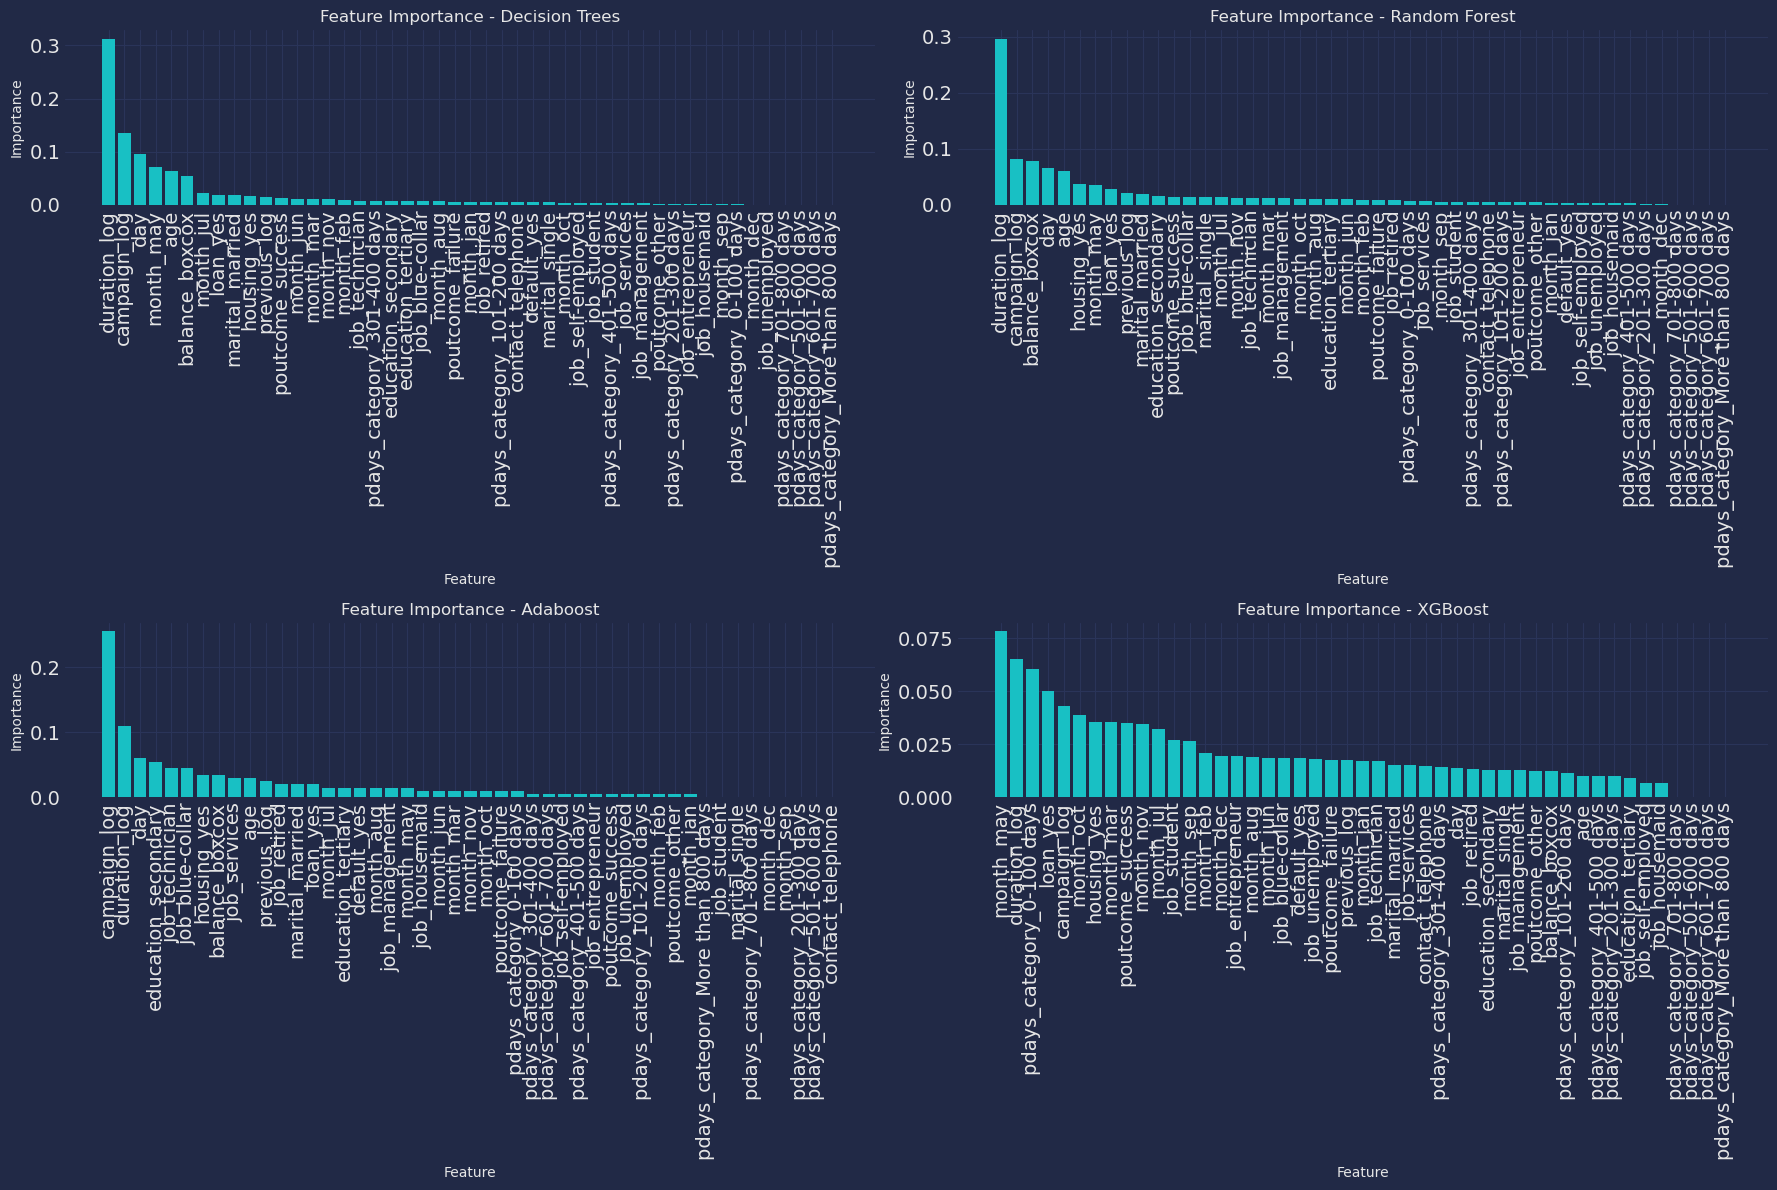

In [94]:
# Define features
feature_names = impute_data.columns
columns = np.array(feature_names)
# Remove 'subscribed' column
feature_names = np.delete(columns, np.where(columns == 'subscribed'))

# Define the models
models = {
    'Decision Trees': best_model_DT,
    'Random Forest': best_model_RF,
    'Adaboost': best_model_AdaBoost,
    'XGBoost': best_model_XGB
}

plt.figure(figsize=(18, 12))

# Plot feature importance for each model
for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    plt.title(f"Feature Importance - {model_name}")
    feature_importances = model.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
    plt.xticks(range(len(sorted_indices)), feature_names[sorted_indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")

plt.tight_layout()
plt.show()


<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Feature Importance Analysis 📊:</strong></p>
    <p>In Decision Trees (DT), Random Forest (RF), and AdaBoost models, we observe that the "a feature" is significantly more important compared to others. However, in XGBoost, which achieves the highest accuracy, we can see that "poutcome" holds the highest importance, although it does not differ significantly from other features.</p>
</div>


<a id="29"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Model Saving 💾</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [95]:
# Define the models and their respective file paths
models = {
    'best_model_LR':'best_model_LR.h5',
    'best_model_KNN':'best_model_KNN.h5',
    'best_model_SVM':'best_model_SVM.h5',
    'best_model_DT': 'best_model_DT.h5',
    'best_model_RF': 'best_model_RF.h5',
    'best_model_AdaBoost': 'best_model_AdaBoost.h5',
    'best_model_XGB': 'best_model_XGB.h5'
}

# Loop through the models dictionary and save each model
for model_name, file_path in models.items():
    # Get the model object
    model = globals()[model_name]

    # Save the model
    joblib.dump(model, file_path)

    print(f"Saved {model_name} as {file_path}")


Saved best_model_LR as best_model_LR.h5
Saved best_model_KNN as best_model_KNN.h5
Saved best_model_SVM as best_model_SVM.h5
Saved best_model_DT as best_model_DT.h5
Saved best_model_RF as best_model_RF.h5
Saved best_model_AdaBoost as best_model_AdaBoost.h5
Saved best_model_XGB as best_model_XGB.h5


<a id="30"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Conclusion 🎉</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [96]:
Conclusion = pd.DataFrame({'Models':['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree',
                                     'Random Forest', 'AdaBoost', 'XGBoost'],
                          'train_acc':
                           [train_score_LR, train_score_KNN, train_score_SVM, train_score_DT, train_score_RF, train_score_AdaBoost, train_score_XGB],
                          'training_time (s)':
                           [train_time_LR, train_time_KNN,  train_time_SVM,  train_time_DT, train_time_RF, train_time_AdaBoost, train_time_XGB],
                          'test_acc':
                           [accuracy_LR, accuracy_KNN,  accuracy_SVM,  accuracy_DT, accuracy_RF, accuracy_AdaBoost, accuracy_XGB],
                           'f1-micro':
                           [f1_micro_LR, f1_micro_KNN,  f1_micro_SVM,  f1_micro_DT, f1_micro_RF, f1_micro_AdaBoost, f1_micro_XGB],
                           'f1-macro':
                           [f1_macro_LR, f1_macro_KNN,  f1_macro_SVM,  f1_macro_DT, f1_macro_RF, f1_macro_AdaBoost, f1_macro_XGB]}).round(3)
Conclusion

,Models,train_acc,training_time (s),test_acc,f1-micro,f1-macro
0,Logistic Regression,0.846,0.414,0.809,0.838,0.674
1,K-Nearest Neighbors,1.000,0.341,0.817,0.828,0.583
2,Support Vector Machine,0.975,0.530,0.853,0.854,0.625
3,Decision Tree,1.000,0.068,0.846,0.856,0.655
4,Random Forest,1.000,3.222,0.888,0.884,0.690
5,AdaBoost,0.929,1.959,0.874,0.880,0.705
6,XGBoost,0.998,0.304,0.893,0.894,0.726


<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Model Performance Evaluation 📈:</strong></p>
    <p>While some models show minor fluctuations in performance due to adjustments, XGBoost consistently demonstrates superior performance with the highest test accuracy and F1 scores, reaffirming its effectiveness as the top-performing model for this classification task.</p>
</div>


<a id="30"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;">Thanks for your attention</p>

In [108]:
X_train_resampled[1:2]

array([[0.19117647, 0.43333333, 0.33921623, 0.        , 0.50751343,
        0.42585668, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])